In [3]:
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

from windwave.fio import read_fields_2D

# from windwave.defs import Case, Interface2D
# from windwave.prepare import read_p, read_fields

%load_ext autoreload
%autoreload 3
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ds = xr.load_dataset('/home/ctrsp-2024/jiarongw/outputs/CU8/span_aver.nc')

In [5]:
ds

<xarray.Dataset> Size: 864MB
Dimensions:  (t: 206, x: 512, y: 512)
Coordinates:
  * t        (t) float64 2kB 40.0 40.1 40.2 40.3 40.4 ... 60.2 60.3 60.4 60.5
  * x        (x) float64 4kB -3.135 -3.123 -3.111 -3.099 ... 3.111 3.123 3.135
  * y        (y) float64 4kB 0.006136 0.01841 0.03068 ... 6.253 6.265 6.277
Data variables:
    ux       (t, x, y) float32 216MB 0.01346 0.01346 0.01346 ... 5.684 5.684
    uy       (t, x, y) float32 216MB 5.677e-06 1.703e-05 ... -0.0001774
    uz       (t, x, y) float32 216MB -1.784e-14 -1.784e-14 ... -0.0008528
    f        (t, x, y) float32 216MB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0

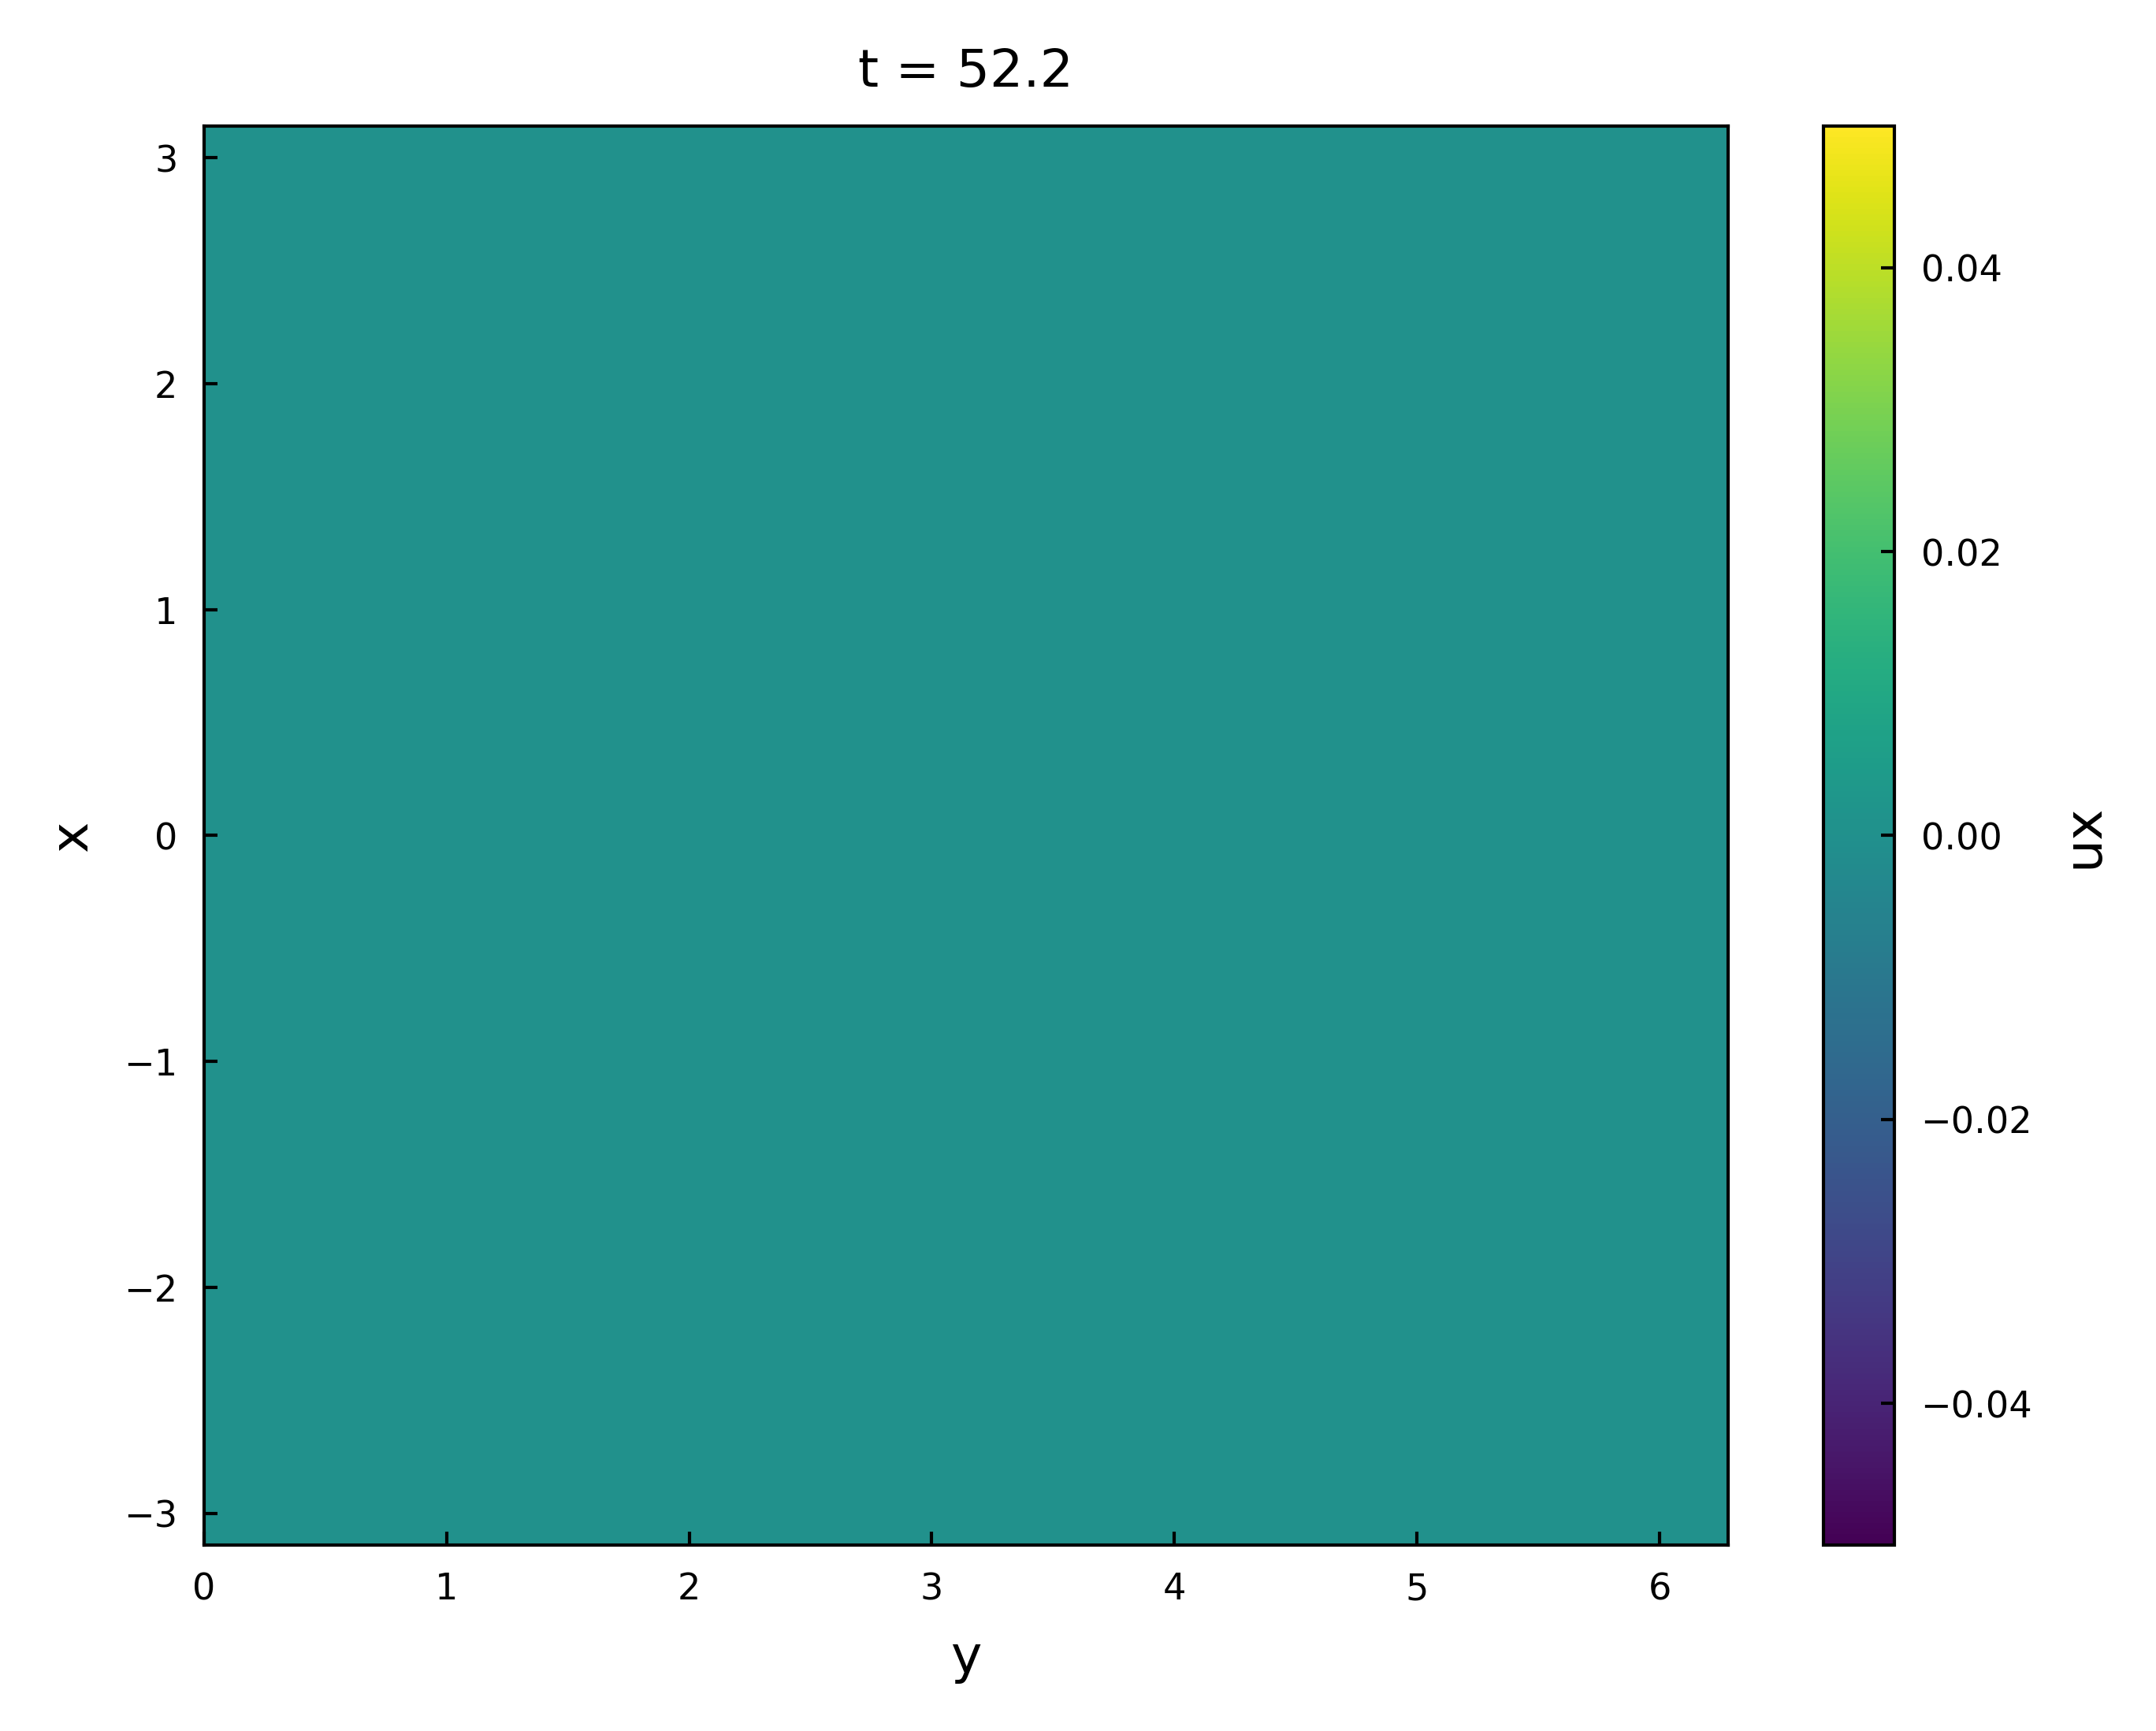

In [22]:
(ds.sel(t=52.2, method='nearest').ux-ds_patch.ux).plot()

In [9]:
path = '/home/ctrsp-2024/jiarongw/outputs/CU8/missing/'
ds_patch = read_fields_2D(path, [52.2], NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

ds.sel(t=52.2, method='nearest').ux = ds_patch.ux

In [15]:
ds.sel(t=52.2, method='nearest')['ux'] = ds_patch.ux
ds.sel(t=52.2, method='nearest')['uy'] = ds_patch.uy
ds.sel(t=52.2, method='nearest')['uz'] = ds_patch.uz
ds.sel(t=52.2, method='nearest')['f'] = ds_patch.f

In [23]:
ds = ds.where(~np.isnan(ds.ux), ds_patch.ux.values)
ds = ds.where(~np.isnan(ds.uy), ds_patch.uy.values)
ds = ds.where(~np.isnan(ds.uz), ds_patch.uz.values)
ds = ds.where(~np.isnan(ds.f), ds_patch.f.values)

In [ ]:
ds

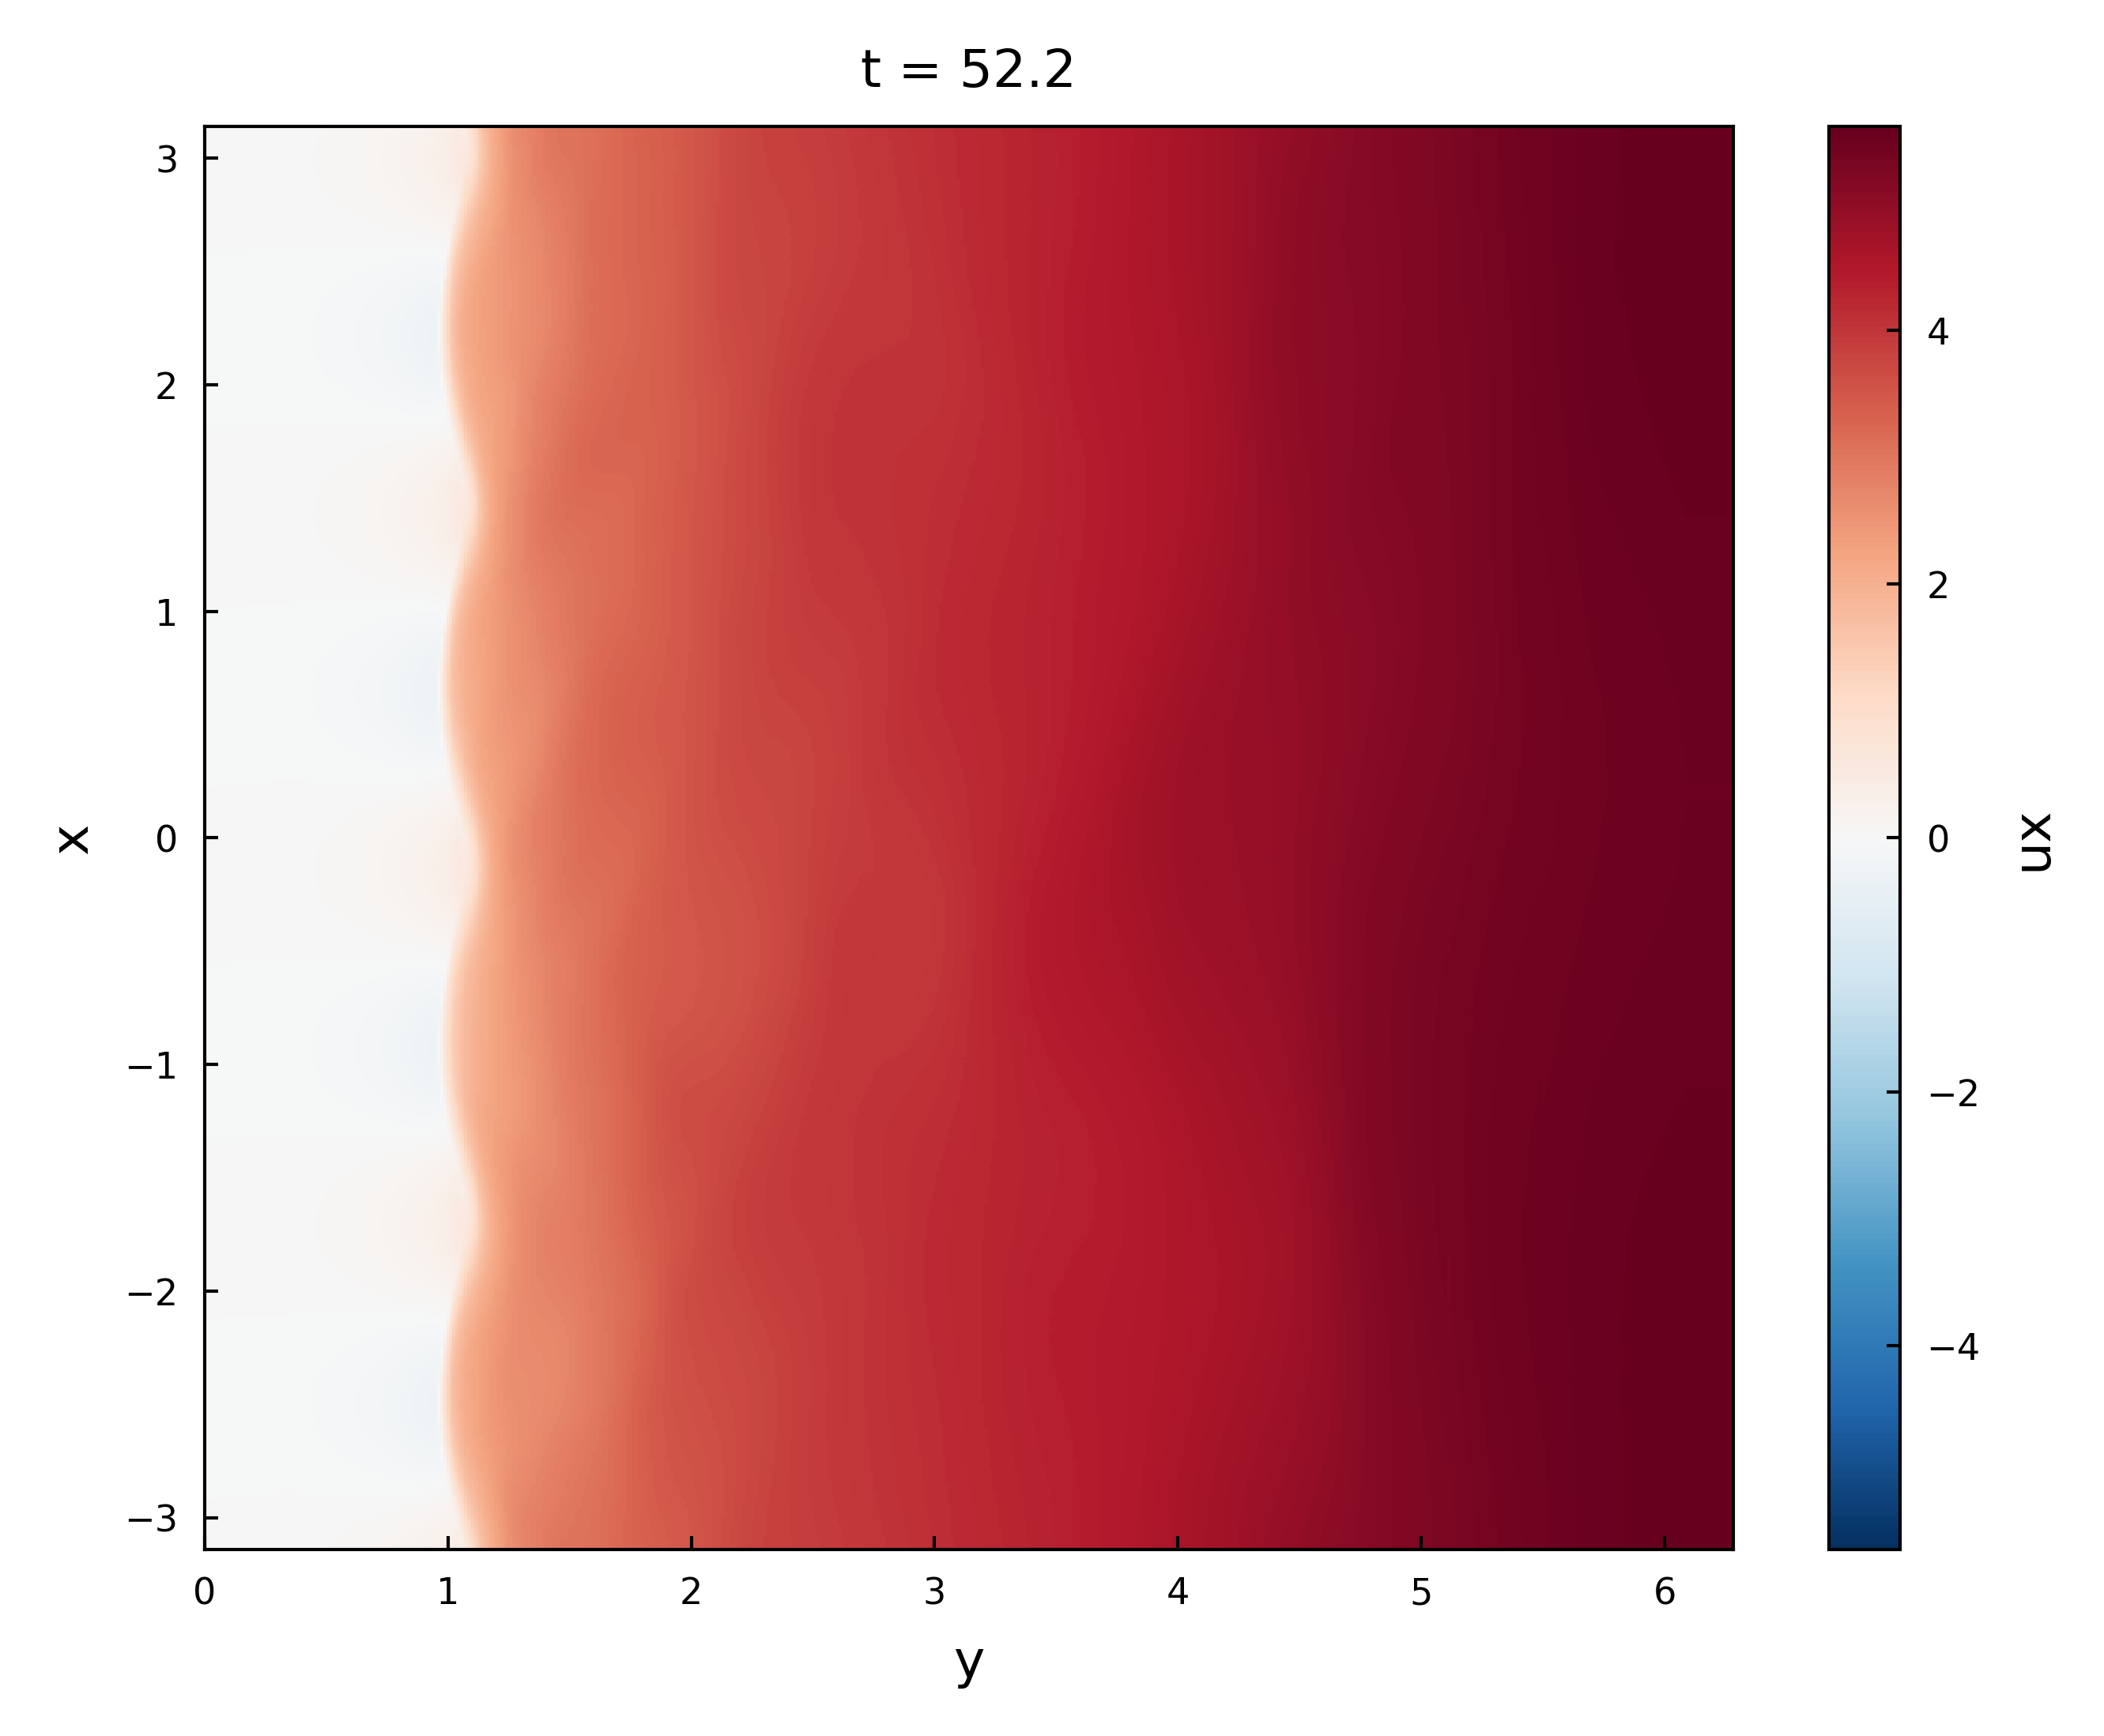

In [10]:
ds_patch.sel(t=52.2, method='nearest').ux.plot()

In [25]:
filename = '/home/ctrsp-2024/jiarongw/outputs/CU8/span_aver_patched.nc'
encoding = {}
for var_name in ds.data_vars:
    encoding[var_name] = {'dtype': 'float32', 'zlib': True}
ds.to_netcdf(filename, encoding=encoding)

### Near-wall-patch

In [3]:
path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU2/'
times = np.arange(45,58,0.1)
ds_CU2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU4/'
times = np.arange(45,53,0.1)
ds_CU4 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8/'
times = np.arange(45,53,0.1)
ds_CU8 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU4/'
times = np.arange(42,45,0.1)
ds_stat = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/CU4/'
times = np.arange(38.5,46.3,0.1)
ds_CU4_old = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

In [7]:
ds_stat

<xarray.Dataset> Size: 252MB
Dimensions:  (t: 30, x: 512, y: 512)
Coordinates:
  * t        (t) float64 240B 42.0 42.1 42.2 42.3 42.4 ... 44.6 44.7 44.8 44.9
  * x        (x) float64 4kB -3.135 -3.123 -3.111 -3.099 ... 3.111 3.123 3.135
  * y        (y) float64 4kB 0.006136 0.01841 0.03068 ... 6.253 6.265 6.277
Data variables:
    ux       (t, x, y) float64 63MB 0.0 0.0 0.0 0.0 ... 5.742 5.742 5.742 5.742
    uy       (t, x, y) float64 63MB 0.0 0.0 0.0 ... 0.0004486 0.0001496
    uz       (t, x, y) float64 63MB 0.0 0.0 0.0 ... -0.001782 -0.001782
    f        (t, x, y) float64 63MB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0

(5.4, 5.8)

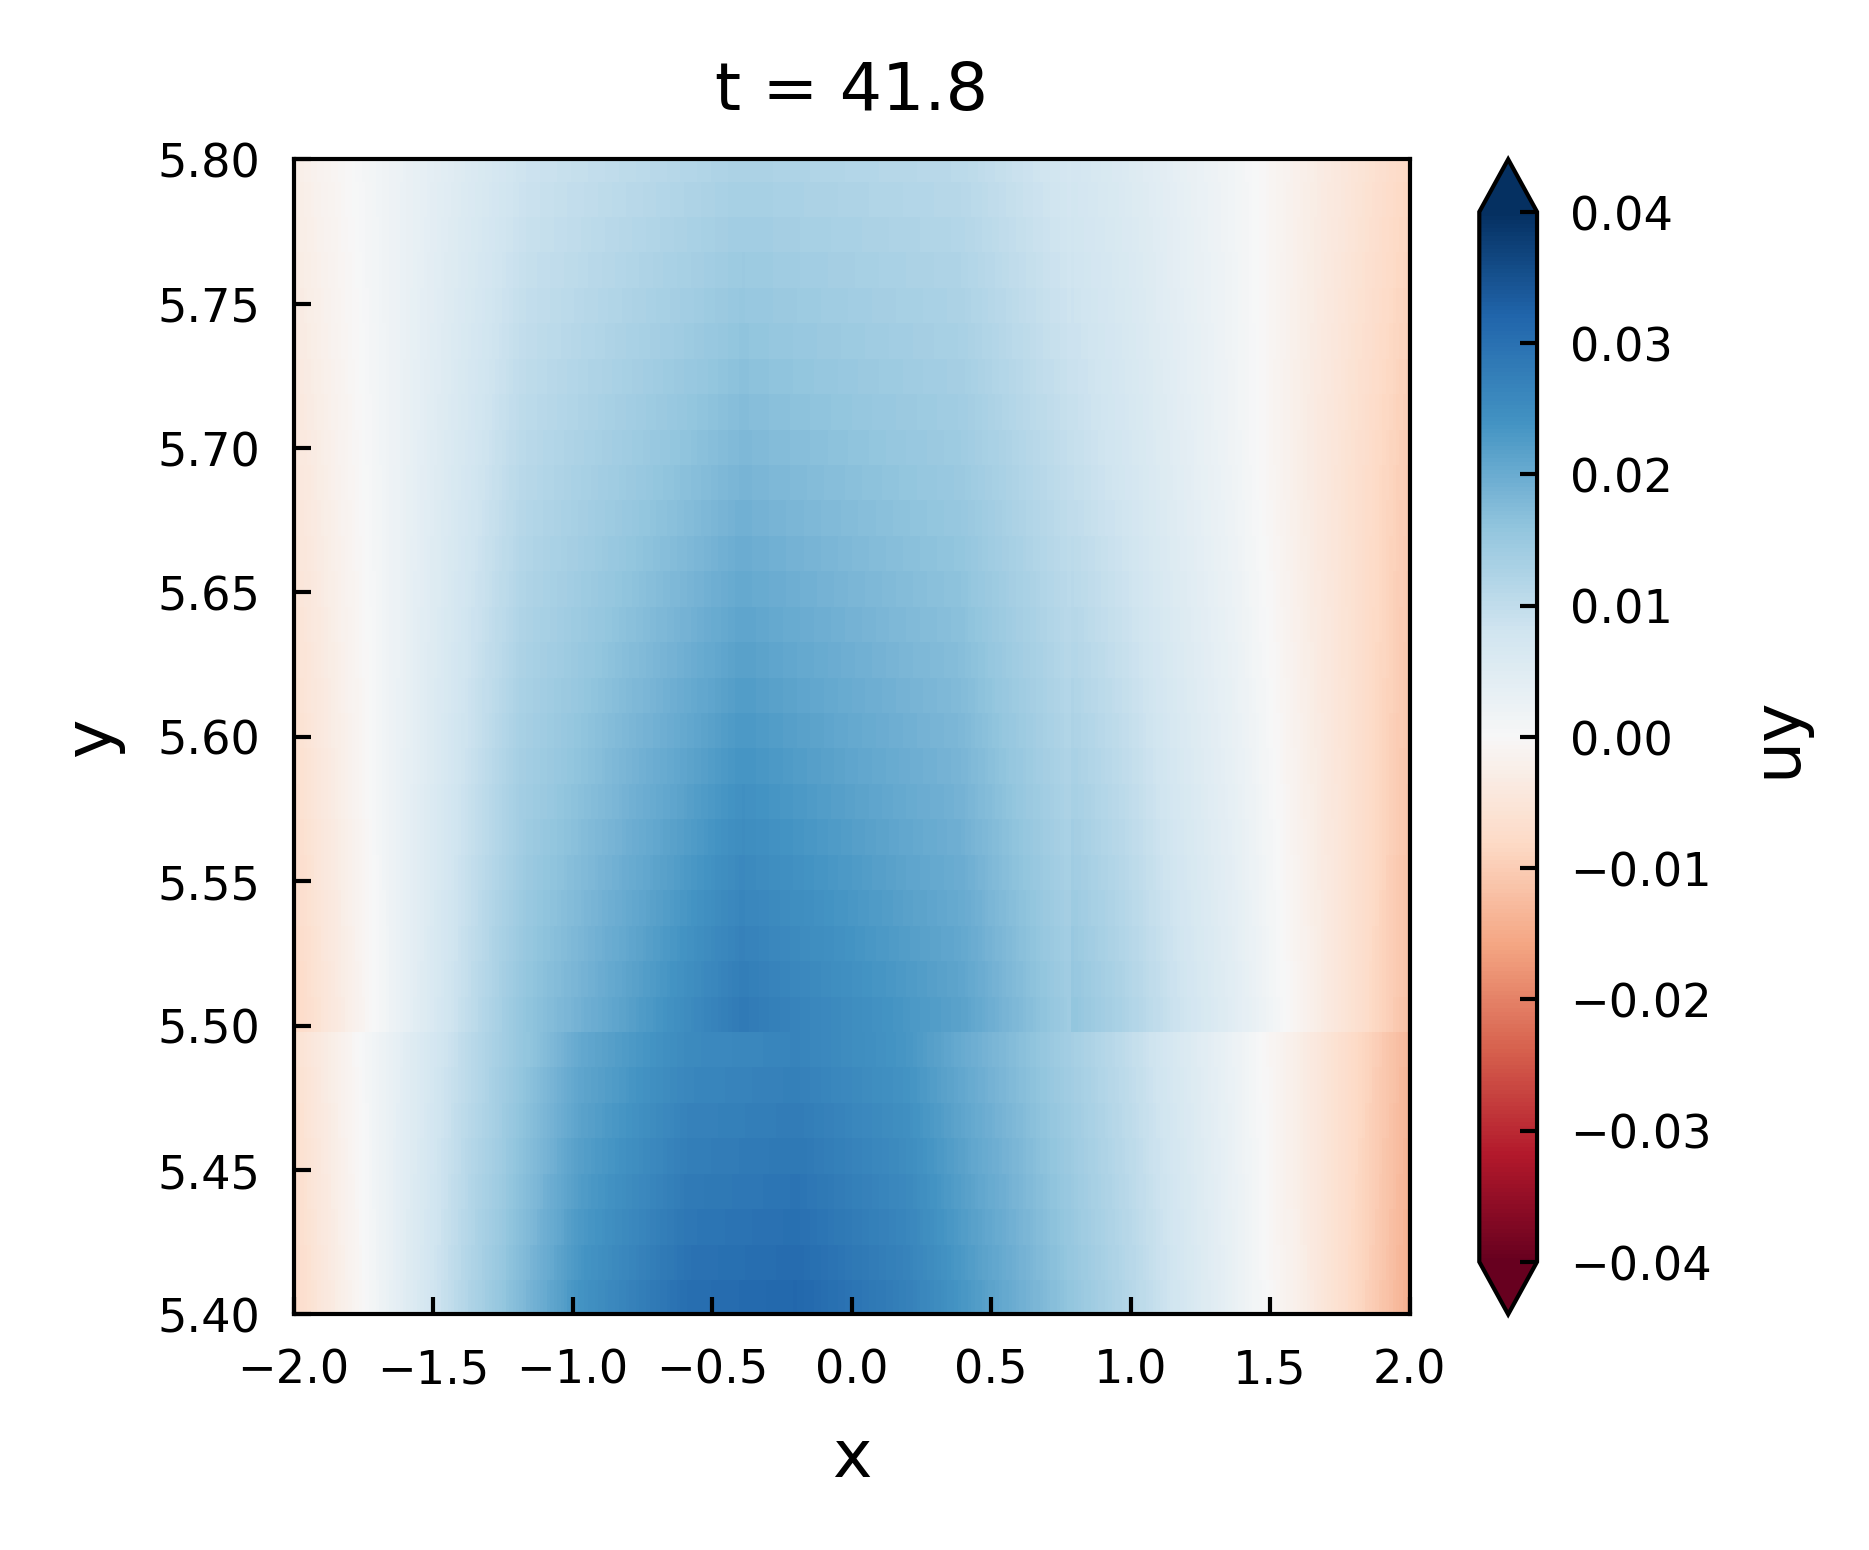

In [44]:
plt.figure(figsize=[3,2.5])
q = ds_CU4_old.uy.sel(t=41.8, method='nearest')
q.plot(x='x', vmin=-0.04, vmax=0.04,cmap='RdBu')
plt.xlim([-2,2]); 
plt.ylim([5.4,5.8])

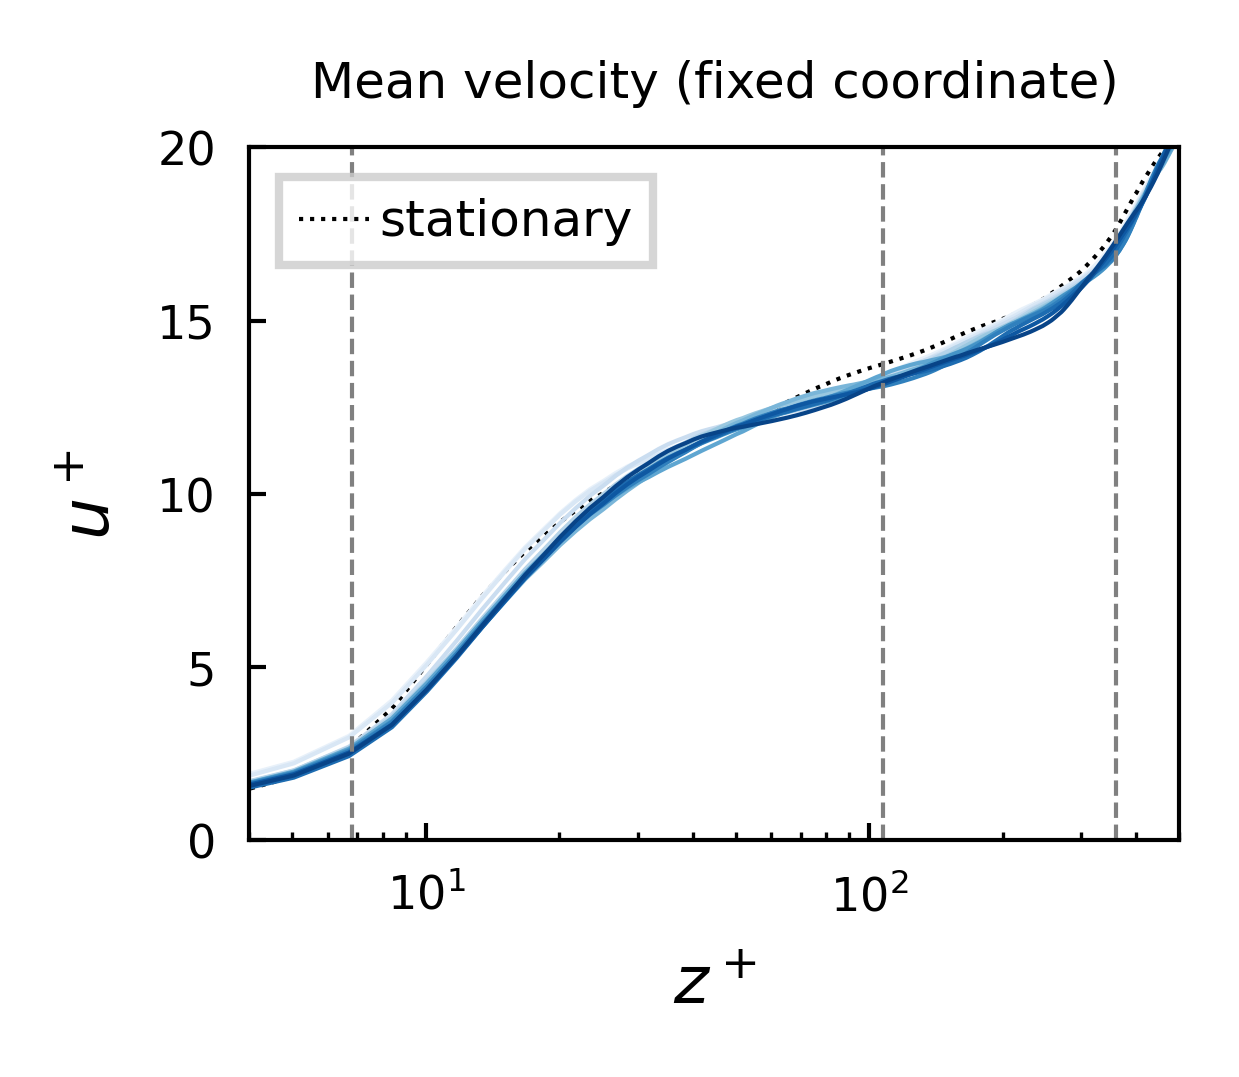

In [14]:
# Select the data within the time range
fig = plt.figure(figsize=[2,1.5])
zwall = (2*np.pi-1)/720.
ustar = 0.25

plt.plot((ds_stat.y-1)/zwall, ds_stat.ux.mean(dim=['x','t'])/ustar, ':', color='k', label='stationary')

ds = ds_CU2
for i in range(10, ds.sizes['t'], 10):
    plt.plot((ds.y-1)/zwall, ds.ux.isel(t=i).mean(dim=['x'])/ustar, 
             c=plt.get_cmap('Blues')(i/ds.sizes['t']))


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
# plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall/2, linestyle='--', c='gray')
plt.axvline(x=(2*np.pi-1)/2./zwall, linestyle='--', c='gray')

plt.xlim([4,500]); plt.ylim([0,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

In [ ]:
ux_2d_avg_t41.8.bin

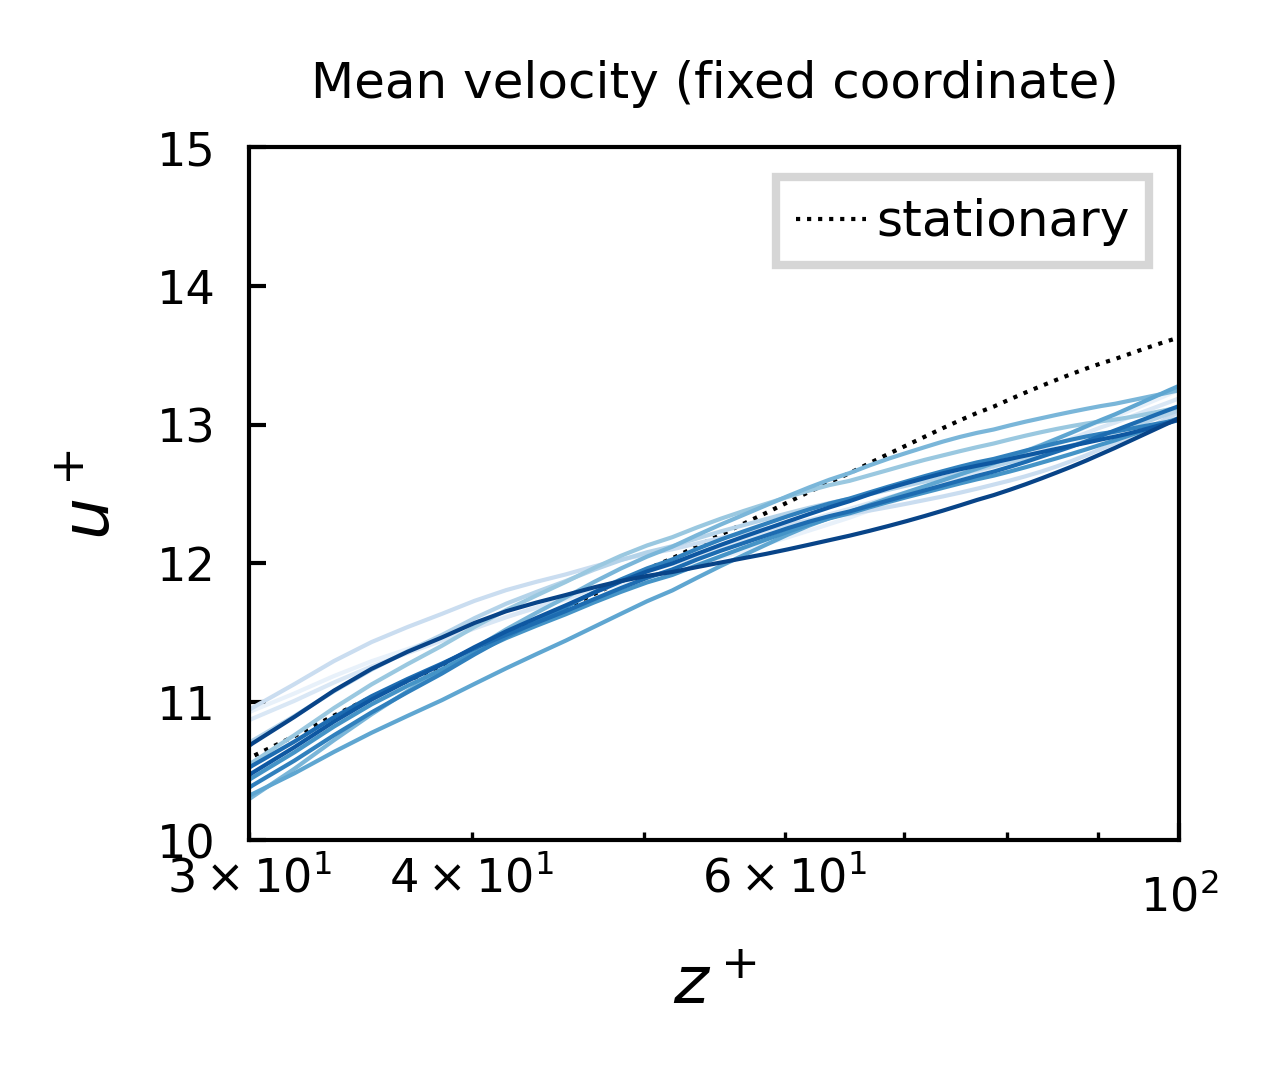

In [13]:
# Select the data within the time range
fig = plt.figure(figsize=[2,1.5])
zwall = (2*np.pi-1)/720.
ustar = 0.25

plt.plot((ds_stat.y-1)/zwall, ds_stat.ux.mean(dim=['x','t'])/ustar, ':', color='k', label='stationary')

ds = ds_CU2
### TODO: resample by taking mean
ds = ds.ux.resample()
for i in range(10, ds.sizes['t'], 10):
    plt.plot((ds.y-1)/zwall, ds.ux.isel(t=i).mean(dim=['x'])/ustar, 
             c=plt.get_cmap('Blues')(i/ds.sizes['t']))


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
# plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall/2, linestyle='--', c='gray')
plt.axvline(x=(2*np.pi-1)/2./zwall, linestyle='--', c='gray')

plt.xlim([30,100]); plt.ylim([10,15])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

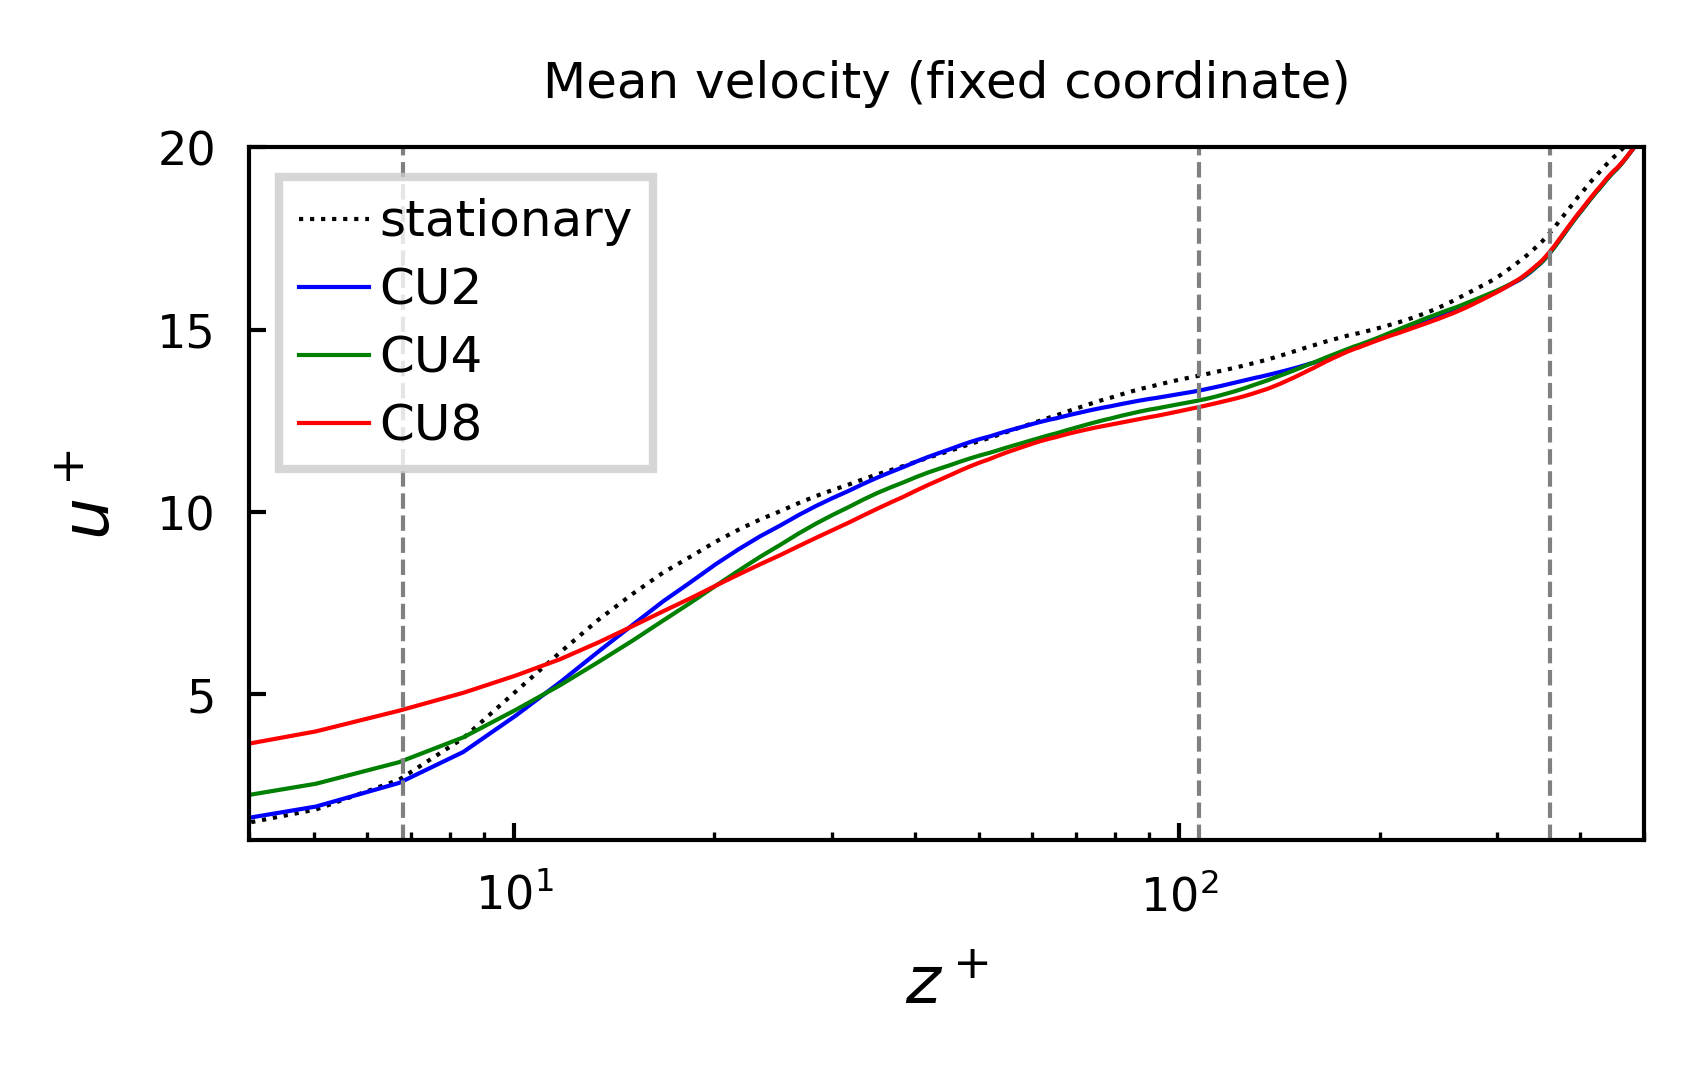

In [45]:
# Select the data within the time range
fig = plt.figure(figsize=[3,1.5])
zwall = (2*np.pi-1)/720.
ustar = 0.25

plt.plot((ds_stat.y-1)/zwall, ds_stat.ux.mean(dim=['x','t'])/ustar, ':', color='k', label='stationary')

labels = ['CU2', 'CU4', 'CU8']
for i, ds in enumerate([ds_CU2,ds_CU4,ds_CU8]):
    plt.plot((ds.y-1)/zwall, ds.ux.isel(t=slice(50,70)).mean(dim=['x','t'])/ustar, label=labels[i])


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
# plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall/2, linestyle='--', c='gray')
plt.axvline(x=(2*np.pi-1)/2./zwall, linestyle='--', c='gray')

plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

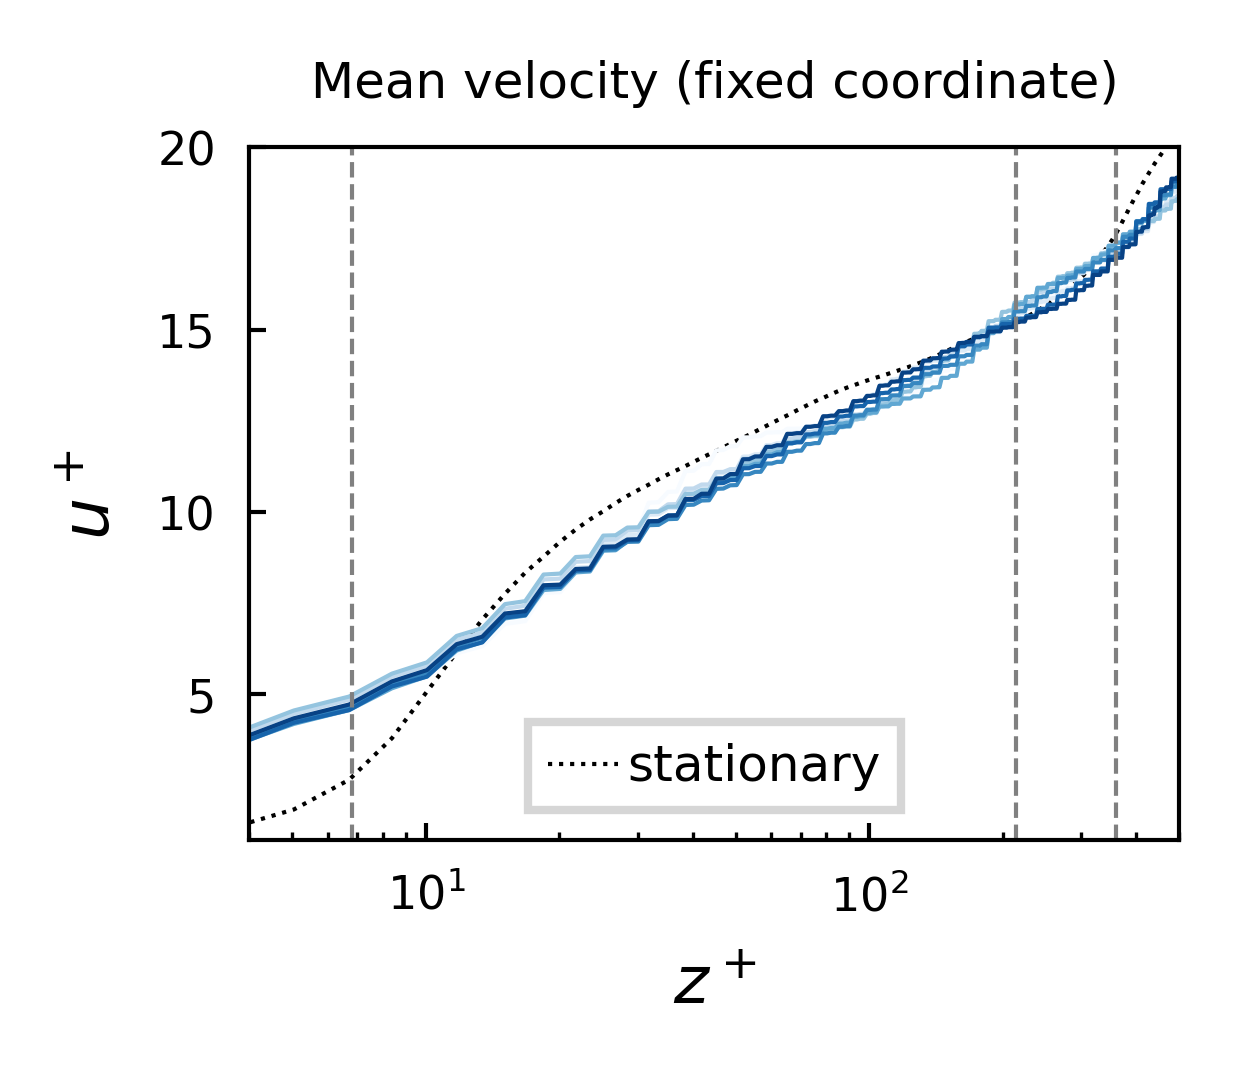

In [60]:
# Select the data within the time range
fig = plt.figure(figsize=[2,1.5])
zwall = (2*np.pi-1)/720.
ustar = 0.25

plt.plot((ds_stat.y-1)/zwall, ds_stat.ux.mean(dim=['x','t'])/ustar, ':', color='k', label='stationary')

ds = ds_old_CU8
for i in range(0, ds_old_CU8.sizes['t'], 2):
    plt.plot((ds.y-1)/zwall, ds.ux.isel(t=i).mean(dim=['x','z'])/ustar, 
             c=plt.get_cmap('Blues')(i/ds_old_CU8.sizes['t']))

plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.axvline(x=(2*np.pi-1)/2./zwall, linestyle='--', c='gray')

plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

### Old runs


In [33]:
path = '/home/ctrsp-2024/jiarongw/ctr/post-processing/data/'
ds_old_CU2 = xr.open_mfdataset(path + 'case1/field*.nc', 
    concat_dim='t', combine='nested', chunks={'z':-1, 'x':-1, 'y':-1})
ds_old_CU4 = xr.open_mfdataset(path + 'case2/field*.nc', 
    concat_dim='t', combine='nested', chunks={'z':-1, 'x':-1, 'y':-1}) 
ds_old_CU8 = xr.open_mfdataset(path + 'case3/field*.nc', 
    concat_dim='t', combine='nested', chunks={'z':-1, 'x':-1, 'y':-1})  

NameError: name 'npi' is not defined

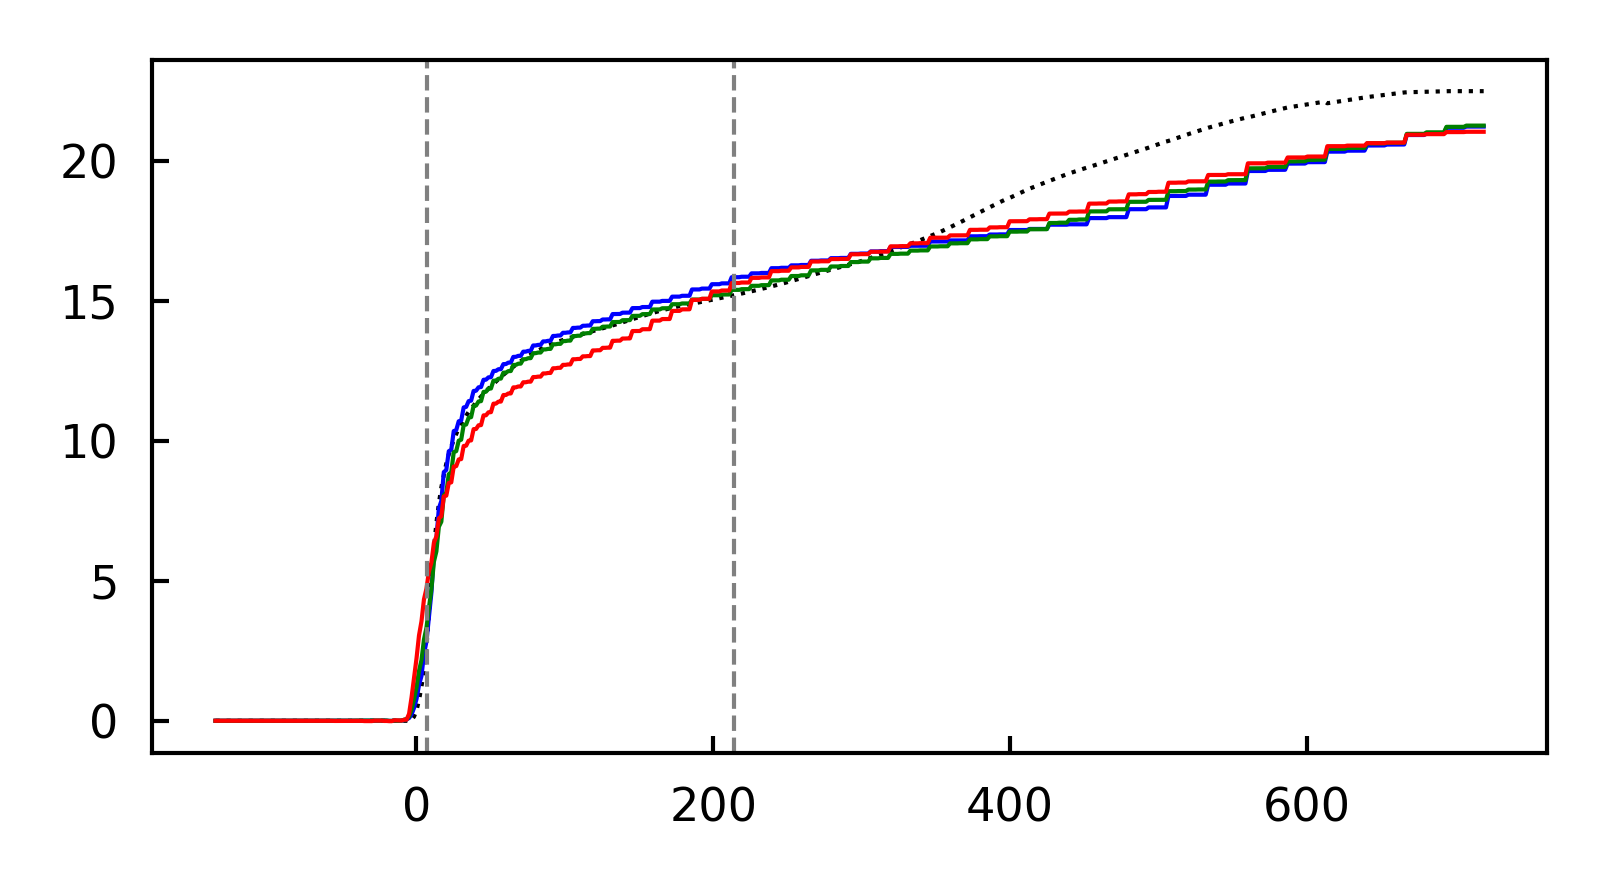

In [42]:
# Select the data within the time range
fig = plt.figure(figsize=[3,1.5])
zwall = (2*np.pi-1)/720.
ustar = 0.25

plt.plot((ds_stat.y-1)/zwall, ds_stat.ux.mean(dim=['x','t'])/ustar, ':', color='k', label='stationary')

labels = ['CU2 old', 'CU4 old', 'CU8 old']
for i, ds in enumerate([ds_old_CU2,ds_old_CU4,ds_old_CU8]):
    plt.plot((ds.y-1)/zwall, ds.ux.isel(t=slice(5,10)).mean(dim=['x','z','t'])/ustar, label=labels[i])


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')


plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

In [ ]:
''' What's the best way of computing the phase lag. '''

[Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(-1.5707963267948966, 0, '$-\\pi/2$'),
 Text(0.0, 0, '$0$'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$')]

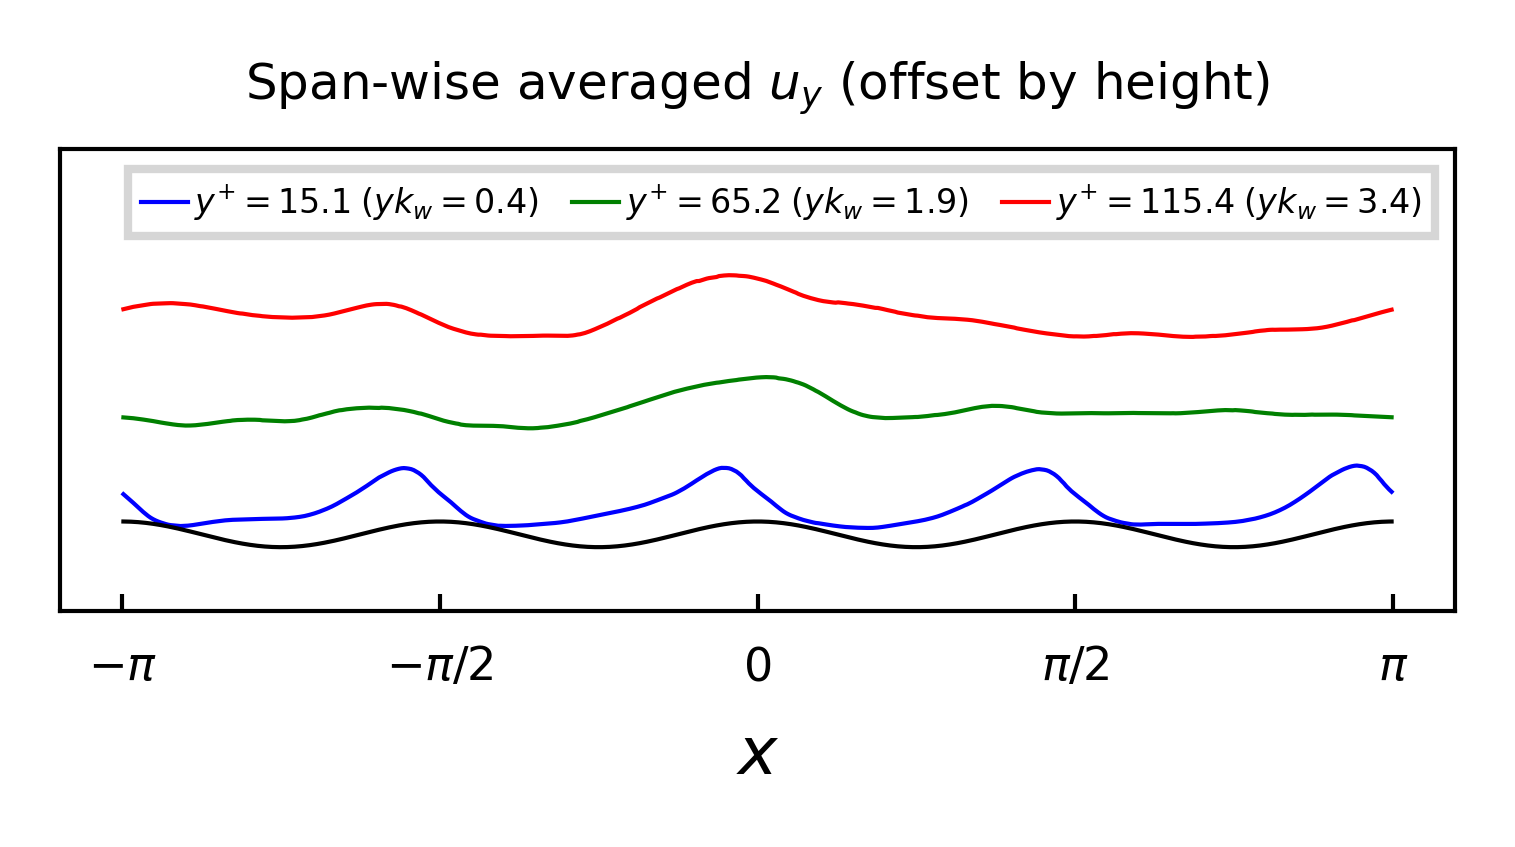

In [11]:
fig = plt.figure(figsize=[3,1])

zwall = (2*np.pi-1)/720
kwave = 4

c = ['b','g','r']
for i, ysel in enumerate((90,120,150)):
    yloc = ds.y.isel(y=ysel) - 1 
    plt.plot(ds.x, ds.uy.isel(t=0,y=ysel)+yloc, c=c[i],
             label='$y^{+}=%.1f \; (yk_w=%.1f)$' %(yloc/zwall,yloc*kwave))
        
plt.ylim([-.3,1.5])
plt.title('Span-wise averaged $u_y$ (offset by height)', fontsize=6)
plt.xlabel('$x$');plt.ylabel('$u_y$')
plt.legend(ncol=3, fontsize=4)
eta = np.cos(ds.x*kwave)*(0.2/kwave)
plt.plot(ds.x,eta,c='k')

ax = plt.gca()
ax.axes.get_yaxis().set_visible(False)
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

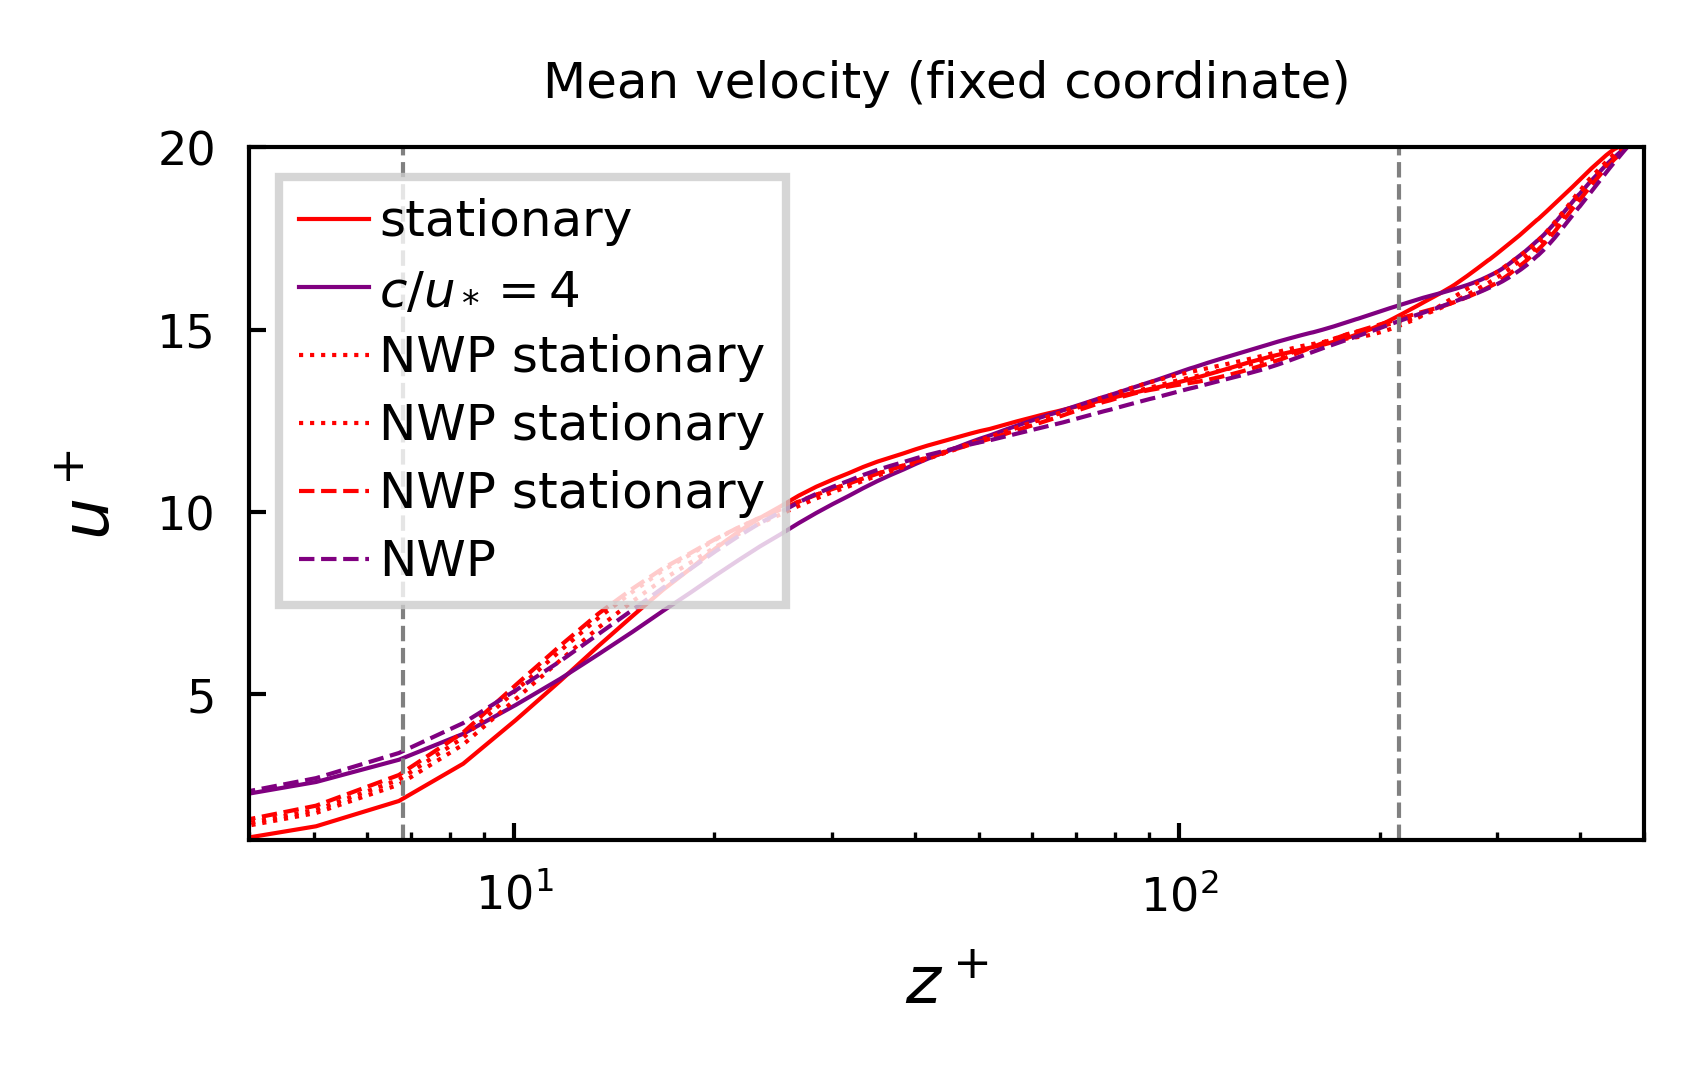

In [24]:
# Select the data within the time range
ds_sub1 = ds.ux.sel(t=slice(38.5,40))
ds_sub2 = ds.ux.sel(t=slice(44,46))
zwall = (2*np.pi-1)/720
ustar = 0.25
fig = plt.figure(figsize=[3,1.5])
plt.plot((ds.y-1)/zwall, ds_sub1.mean(dim=['x','t'])/ustar, color='red', label='stationary')
plt.plot((ds.y-1)/zwall, ds_sub2.mean(dim=['x','t'])/ustar, color='purple', label='$c/u_*=4$')

# NWP
ds_NWP_sub0 = ds_NWP.ux.sel(t=slice(42,43))
plt.plot((ds.y-1)/zwall, ds_NWP_sub0.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')

ds_NWP_sub1 = ds_NWP.ux.sel(t=slice(43,44))
plt.plot((ds.y-1)/zwall, ds_NWP_sub1.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')
ds_NWP_sub2 = ds_NWP.ux.sel(t=slice(44,45))
plt.plot((ds.y-1)/zwall, ds_NWP_sub2.mean(dim=['x','t'])/ustar, '--', color='red', label='NWP stationary')
ds_NWP_moving = ds_NWP.ux.sel(t=slice(45,47))
plt.plot((ds.y-1)/zwall, ds_NWP_moving.mean(dim=['x','t'])/ustar, '--', color='purple', label='NWP')


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

In [ ]:
# Specify the path of the folder you want to create
folder = '../plots/test_full'
os.makedirs(folder, exist_ok=True)

for i in range(0,len(ds.t)):   
    fig = plt.figure(figsize=[3,2])
    ax = plt.gca()
    im = ds.uy.isel(t=i).plot(x='x',vmax=0.3,vmin=-0.3,cmap='RdBu_r',
                         cbar_kwargs={'label':'$u_y$'})
    ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.savefig(folder+'/uy_%g.png' %i)

### 2D field

Text(0, 0.5, '$y$')

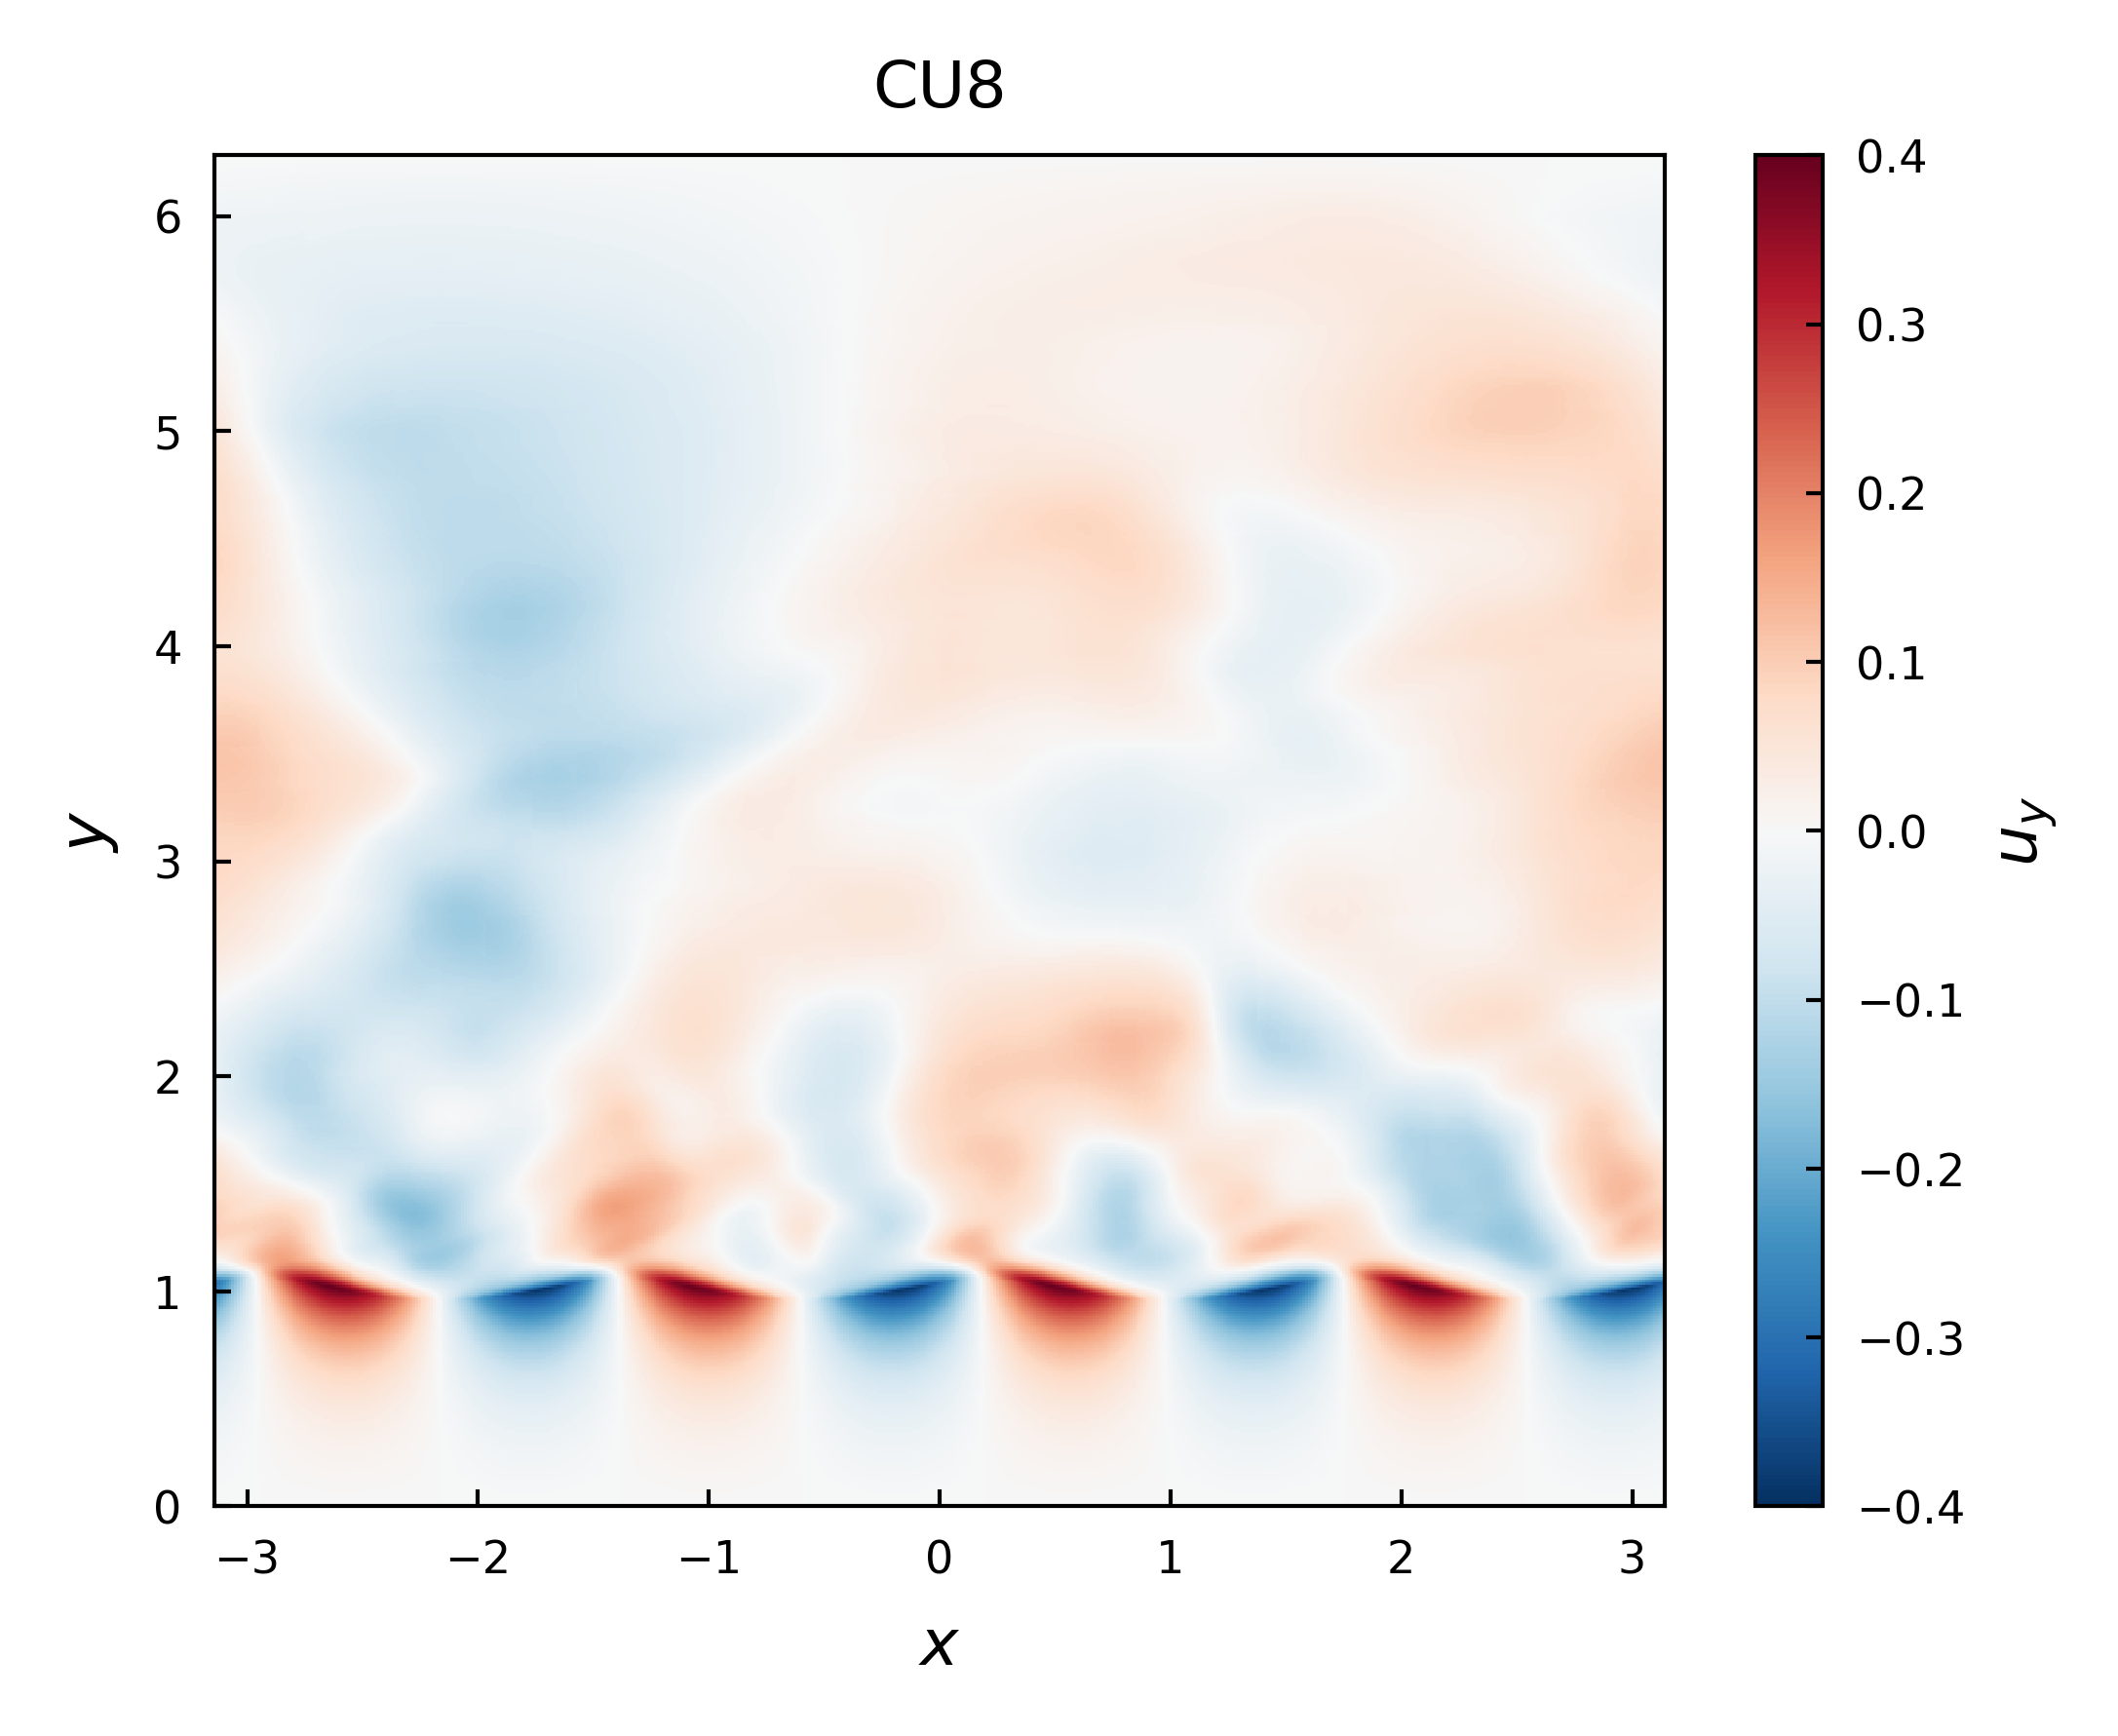

In [29]:
plt.figure(figsize=[4,3])
# pair.isel(t=0).plot(x='x', cmap='RdBu_r')
time = 52
ds_CU8.uy.sel(t=time, method='nearest').plot(x='x', cmap='RdBu_r', vmax=0.4, vmin=-0.4, 
                                            cbar_kwargs={'label':'$u_y$'})
plt.title('CU8'); plt.xlabel('$x$'); plt.ylabel('$y$')

In [ ]:
plt.figure(figsize=[3,3])
# pair.isel(t=0).plot(x='x', cmap='RdBu_r')
time = 39.5
(ds_NWP2.uy.sel(t=time)).plot(x='x', cmap='RdBu_r')

In [41]:
path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times = np.arange(39.5,40,0.5)
ds_NWP2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f','ax','pair'])
ds_NWP2

<xarray.Dataset> Size: 13MB
Dimensions:  (t: 1, x: 512, y: 512)
Coordinates:
  * t        (t) float64 8B 39.5
  * x        (x) float64 4kB -3.135 -3.123 -3.111 -3.099 ... 3.111 3.123 3.135
  * y        (y) float64 4kB 0.006136 0.01841 0.03068 ... 6.253 6.265 6.277
Data variables:
    ux       (t, x, y) float64 2MB 7.409e-07 7.409e-07 7.409e-07 ... 5.449 5.449
    uy       (t, x, y) float64 2MB -8.223e-07 -2.467e-06 ... -5.019e-05
    uz       (t, x, y) float64 2MB 1.127e-13 1.127e-13 ... 0.0002173 0.0002173
    f        (t, x, y) float64 2MB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    ax       (t, x, y) float64 2MB 0.01055 0.01055 0.01055 ... 0.04634 0.04634
    pair     (t, x, y) float64 2MB 0.0 0.0 0.0 0.0 ... 0.06653 0.06653 0.06653

In [42]:
def convert_to_0_2pi(angle_rad_original):
    angle_rad = angle_rad_original % (2 * np.pi)  # Ensure angle is within [0, 2*pi)
    np.where(angle_rad < 0, angle_rad + 2 * np.pi, angle_rad)    
    return angle_rad

kx = 4
xtemp = ds_NWP2.x.copy(deep=True).values
theta = convert_to_0_2pi(xtemp*kx)
ds_NWP2 = ds_NWP2.assign_coords({'x': theta})
ds_NWP2 = ds_NWP2.rename({'x': 'phase'})
ds_NWP2 = ds_NWP2.assign_coords({'x': ('phase', xtemp)})


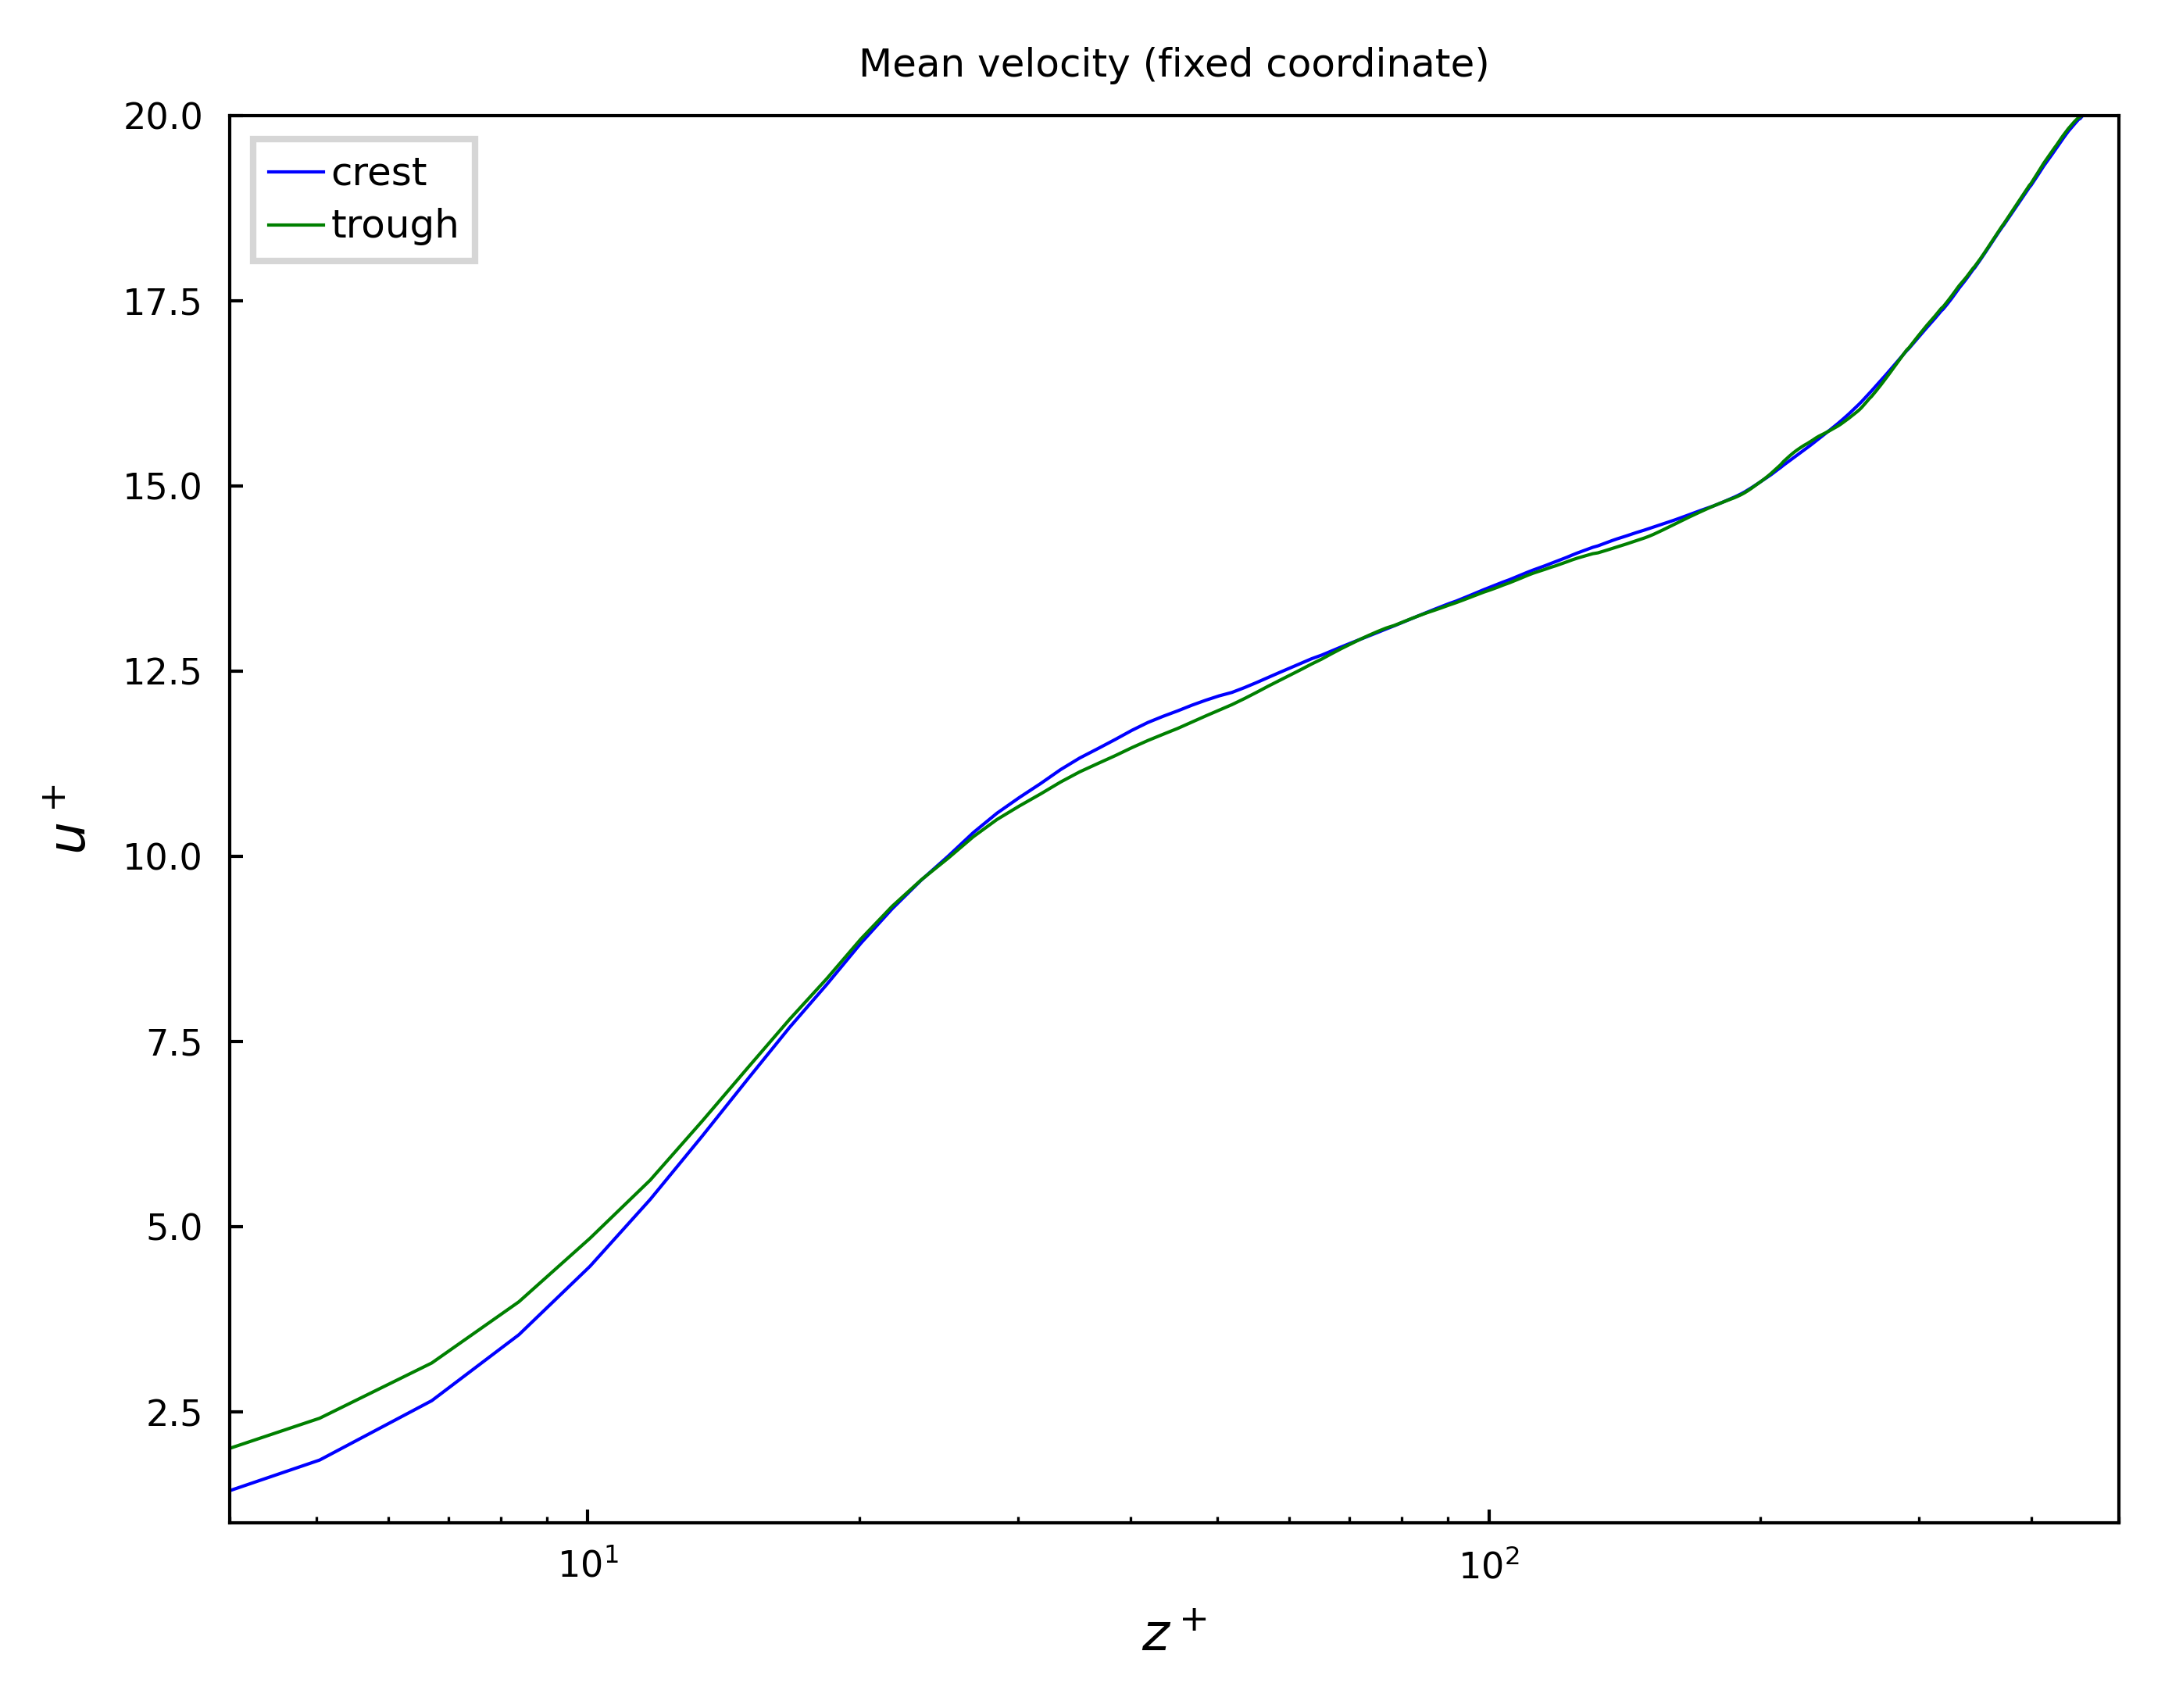

In [80]:
ds = 

zwall = (2*np.pi-1)/720
ustar = 0.25

tol = 2*np.pi/(512/4)

crest1 = ds.where(abs(ds.phase-np.pi/2)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
crest2 = ds.where(abs(ds.phase-3*np.pi/2)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
plt.plot((ds.y-1)/zwall, (crest1+crest2)/2/ustar, label='crest')
trough1 = ds.where(abs(ds.phase-np.pi)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
trough2 = ds.where(abs(ds.phase-np.pi)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
plt.plot((ds.y-1)/zwall, (trough1+trough2)/2/ustar, label='trough')

plt.xlim([4,500])
plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

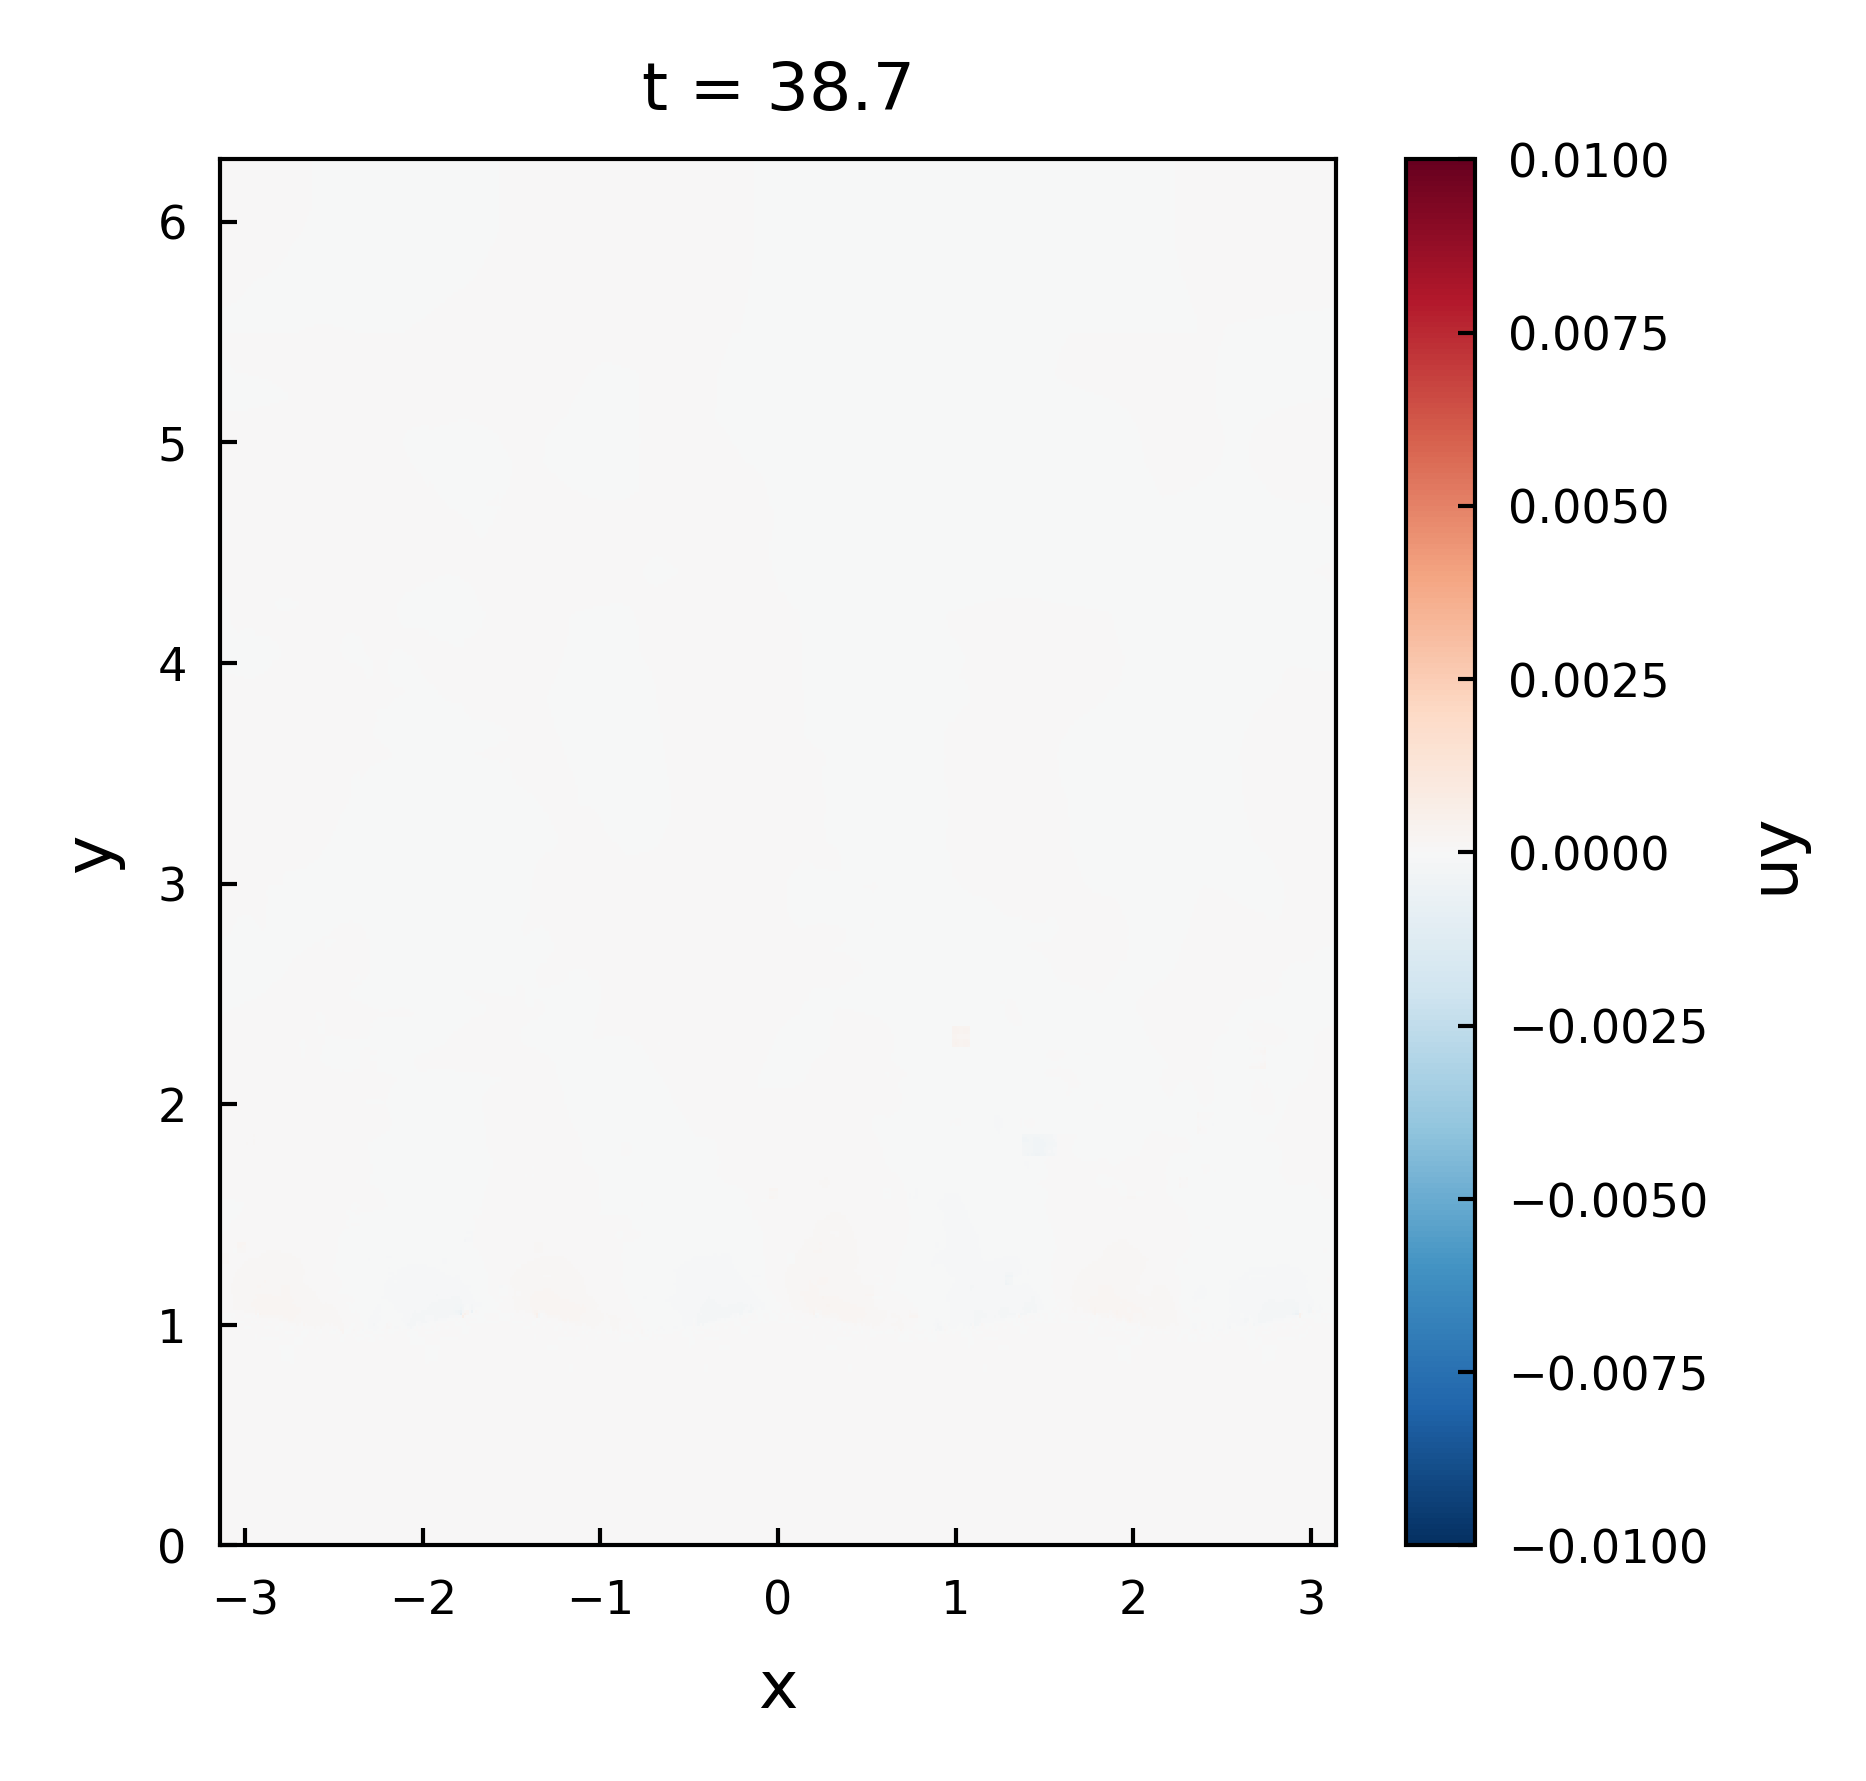

In [25]:
plt.figure(figsize=[3,3])
t = 38.7
(ds_NWP.uy.sel(t=t)-ds.uy.sel(t=t)).plot(x='x', cmap='RdBu_r', vmax=0.01, vmin=-0.01)